# Step#1. Getting SetUp

In [ ]:
import tensorflow as tf
tf.__version__

'2.19.0'

To check tensorflow libraries we have

In [ ]:
!pip install --upgrade gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 1.14.0
    Uninstalling gradio_client-1.14.0:
      Successfully uninstalled gradio_client-1.14.0
  Attempting uninstall: gradio
    Found existing installation: gradio 5.50.0
    Uninstalling gradio-5.50.0:
      Successfully uninstalled gradio-5.50.0


In [ ]:
!pip list | grep tensorflow

tensorflow                               2.19.0
tensorflow-datasets                      4.9.9
tensorflow_decision_forests              1.12.0
tensorflow-hub                           0.16.1
tensorflow-metadata                      1.17.2
tensorflow-probability                   0.25.0
tensorflow-text                          2.19.0


To check if you have a GPU attached. Run the following

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

Num GPUs Available:  1


# Step#2 : Getting our data

All machine learning (and deep learning) projects start with data.

The good news is that there are several options and locations to get data for a deep learning project, such as Kaggle, Hugging Face, or even direct from TensorFlow.

In our case, the dataset we're going to use is called the Stanford Dogs dataset (sometimes referred to as the ‘ImageNet dogs’, as the images are dogs separated from ImageNet).

**Our Overall GOAL is to build a Computer Vision Model that performs better than the ORIGINAL STANFORD DOGS PAPER, whcih had an AVERAGE of 22% accuracy per class across 120 classes of Dogs. **

However, because the Stanford Dogs Dataset has been around for a while(since 2011, which as of writing this in 2024 is like a lifetime in Deep learning).

# Why is this Important?

When you're starting out with practicing deep learning projects, there's usually no shortage of datasets available.

However, when you start work on your own projects or within a company environment, you'll likely start to work on custom datasets i.e. DATASETS you BUILD YOURSELF or are NOT AVAILABLE PUBLICLY ONLINE.



This means that **MAIN DIFFERENCE between EXISTING Datasets and CUSTOM datasets is that Existing datasts often come with PREFORMATTED and READY TO USE.**

Whereas **Custom Dataset** often require some **PREPROCESSING** **before** thay are **ready to use** within a machine learning project.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/stanford-dogs-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'stanford-dogs-dataset' dataset.
Path to dataset files: /kaggle/input/stanford-dogs-dataset


In [ ]:
# Download the dataset into train and test split using TensorFlow Datasets
# import tensorflow_datasets as tfds
# ds_train, ds_test = tfds.load('stanford_dogs', split=['train', 'test'])

In [ ]:
# all TENSORFLOW NLP Libraries an Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import tensorflow as tf
import tensorflow_hub as hub # For pre-trained models like BERT
import tensorflow_datasets as tfds # For loading NLP datasets
import re # For text cleaning
import nltk # For general NLP tasks
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


In [ ]:
from pathlib import Path
from google.colab import drive

# 1. Mount Google Drive (this will bring up a pop-up to sign-in/authenticate)
# Note: This step is specifically for Google Colab, if you're working locally, you may need a different setup
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read BOTTOM TO UP
# 2. Setup constants
# Note: For constants like this, you'll often see them created as variables with all capitals
TARGET_DRIVE_PATH = Path("/content/drive/MyDrive/ALMA_better/Tensor_pytorch/dog_vision_data/dog_vision_data")
TARGET_FILES = ["images.tar", "annotation.tar", "lists.tar"]
TARGET_URL = "http://vision.stanford.edu/aditya86/ImageNetDogs"


In [ ]:
# 3. Setup local path
local_dir = Path("dog_vision_data")

In [ ]:
# 4. Check if the target files exist in Google Drive, if so, copy them to Google Colab
if all((TARGET_DRIVE_PATH / file).is_file() for file in TARGET_FILES):
  print(f"[INFO] Copying Dog Vision files from Google Drive to local directory...")
  print(f"[INFO] Source dir: {TARGET_DRIVE_PATH} -> Target dir: {local_dir}")
  !cp -r {TARGET_DRIVE_PATH} .
  print("[INFO] Good to go!")

else:
  # 5. If the files don't exist in Google Drive, download them
  print(f"[INFO] Target files not found in Google Drive.")
  print(f"[INFO] Downloading the target files... this shouldn't take too long...")
  for file in TARGET_FILES:
    # wget is short for "world wide web get", as in "get a file from the web"
    # -nc or --no-clobber = don't download files that already exist locally
    # -P = save the target file to a specified prefix, in our case, local_dir
    !wget -nc {TARGET_URL}/{file} -P {local_dir} # the "!" means to execute the command on the command line rather than in Python

  print(f"[INFO] Saving the target files to Google Drive, so they can be loaded later...")

  # 6. Ensure target directory in Google Drive exists
  TARGET_DRIVE_PATH.mkdir(parents=True, exist_ok=True)

  # 7. Copy downloaded files to Google Drive (so we can use them later and not have to re-download them)
  !cp -r {local_dir}/* {TARGET_DRIVE_PATH}/

[INFO] Copying Dog Vision files from Google Drive to local directory...
[INFO] Source dir: /content/drive/MyDrive/ALMA_better/Tensor_pytorch/dog_vision_data/dog_vision_data -> Target dir: dog_vision_data
[INFO] Good to go!


# Hence Proved..


our goal is to print files like this

In [ ]:
#local_dir is local_folder
if local_dir.exists():
  print(str(local_dir) + "/")
  for item in local_dir.iterdir():
    print("  ", item.name)

dog_vision_data/
   annotation.tar
   images.tar
   lists.tar


Excellent! That's exactly the format we wanted.

In [ ]:
# Untar images, notes/tags:
# -x = extract files from the zipped file
# -v = verbose
# -z = decompress files
# -f = tell tar which file to deal with
!tar -xf dog_vision_data/images.tar
!tar -xf dog_vision_data/annotation.tar
!tar -xf dog_vision_data/lists.tar

Well, we can check in Google Colab by inspecting the "Files" tab on the left, or with Python by using os.listdir(".") where "." means "the current directory".

In [ ]:
import os
os.listdir(".") # "." stands for here and current directory

['.config',
 'train_list.mat',
 'drive',
 'dog_vision_data',
 'Images',
 'test_list.mat',
 'Annotation',
 'file_list.mat',
 'sample_data']

# Step3 : Exploring the Data

View atleat 100+ random samples

# Visiualize, visualize, visualize!
This is the data explorer's Motto!

check the distribution and other statistics methods

How many samples are there?

if you are dealing with classification, how many classes and labels per class are there?

which classes don't you understand?
if you don't have labels, investigate clustering methods to put similar samples close together

# How to open Matlab files in colab

The good news is that we can use scipy library( a scientific computing library) to OPEN these.

But, even better news, is that Google Colab comes withscipy preinstalled, we can use the scipy.io.loadmat() method to open a .mat file, like so:

In [ ]:
import scipy

# open list of train and test .Mat
train_list = scipy.io.loadmat("train_list.mat")
test_list = scipy.io.loadmat("test_list.mat")
file_list = scipy.io.loadmat("file_list.mat")

# Let's inspect the outpu and type of the train_list
train_list,type(train_list)

({'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct  9 08:36:13 2011',
  '__version__': '1.0',
  '__globals__': [],
  'file_list': array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
         [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
         [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
         ...,
         [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
         [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
         [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
        dtype=object),
  'annotation_list': array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
         [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
         [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
         ...,
         [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype=

Alright, it looks like we get a dictionary with several fields that we may be interested in.

First off, let's check out the keys of the dictionary.

In [ ]:
train_list.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])

In [ ]:
# Check the length of the file_list key
print(f"Number of files in training list: {len(train_list['file_list'])}")
print(f"Number of files in testing list: {len(test_list['file_list'])}")
print(f"Number of files in full list: {len(file_list['file_list'])}")



Number of files in training list: 12000
Number of files in testing list: 8580
Number of files in full list: 20580


# Beautiful!

It looks like these lists contain our training and test splits,and not only that, but the full list has a list of all the files in the dataset.

So. let's inspect the train_list['file_list'] a little further

In [ ]:
train_list['file_list']


array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
       [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
      dtype=object)

OK, it looks like we've got an array of arrays, so how about we turn them into a Python list for easier handling?

# How to turn an array of arrays into a Python list

We can do so by EXTRACTING each individual item via INDEXING and LIST COMPREHENSION

In [ ]:
# Get a single file name
train_list['file_list'][0][0][0]

np.str_('n02085620-Chihuahua/n02085620_5927.jpg')

In [ ]:
# Get a Python list of all file names for each list
# item[0][0] is the OUTPUT

train_file_list = list([item[0][0] for item in train_list["file_list"]])
test_file_list = list([item[0][0] for item in test_list["file_list"]])
full_file_list = list([item[0][0] for item in file_list["file_list"]])

len(train_file_list),len(test_file_list),len(full_file_list)



(12000, 8580, 20580)

# Wonderful!


Important: if you remember from before, one of my favourite things to do whilst EXPLORING data is to continually VIEW random files of it.Whether it
be file names or images or text snippets, so that I can make sure the data we have is CORRECT at glance, wihtout having to hope for the best, or check every single item.

That's also why I use random numbers

# How to view Random samples in our data

In [ ]:
import random
random.sample(train_file_list, k=10)

[np.str_('n02101006-Gordon_setter/n02101006_3868.jpg'),
 np.str_('n02087046-toy_terrier/n02087046_6029.jpg'),
 np.str_('n02088466-bloodhound/n02088466_8184.jpg'),
 np.str_('n02089973-English_foxhound/n02089973_2150.jpg'),
 np.str_('n02095570-Lakeland_terrier/n02095570_1547.jpg'),
 np.str_('n02106166-Border_collie/n02106166_1460.jpg'),
 np.str_('n02113186-Cardigan/n02113186_10077.jpg'),
 np.str_('n02088094-Afghan_hound/n02088094_8362.jpg'),
 np.str_('n02106382-Bouvier_des_Flandres/n02106382_7656.jpg'),
 np.str_('n02100735-English_setter/n02100735_4972.jpg')]

# How to make sure that your test set and training set is separate

This is important as *number_1* rule in machine learning is  **to always keep the test set separate from the training set**

We can check that there are no overlaps by turning train_file_list into a Python set() and then using the intersection() method.

In [ ]:
# How many files in the training set intersect with the testing set?
len(set(train_file_list).intersection(test_file_list))


0

# Excellent!
It looks like there are no overlaps.

We could even put an assert check to raise an error if there are any overlaps (e.g. the length of the intersection is greater than 0).

(assert works in the fashion: assert expression, message_if_expression_fails).

If the assert check doesn't output anything, then we're good to go!

In [ ]:
# Make an assertion statement to check there are no overlaps (try changing train_file_list to see how it works)
assert len(set(train_file_list).intersection(test_file_list)) == 0, "There are overlaps between the training and test set files, please check them."

# Wooohoo!
Looks like there are no overlaps, so let's keep exploring the data.

# Exploring the Annotation folder

How about we look at the annotation folder next.

We can click the folder on the file explorer on the LEFT to see what's inside, but we can also explore the contents of the folder with Python.

Let's use os.listdir() to see what's inside.

In [ ]:
os.listdir("Annotation")[:10]

['n02098286-West_Highland_white_terrier',
 'n02089867-Walker_hound',
 'n02100236-German_short-haired_pointer',
 'n02088094-Afghan_hound',
 'n02096585-Boston_bull',
 'n02113799-standard_poodle',
 'n02099849-Chesapeake_Bay_retriever',
 'n02104029-kuvasz',
 'n02097298-Scotch_terrier',
 'n02110185-Siberian_husky']

The fields include the name of the image, the size of the image, the label of the object, and where it is (i.e its bounding box coordinates).

If we were performing object detection (finding the location of a thing in an image), we'd pay attention to the <bndbox> coordinates. However, because we're focused on classification, our main consideration is the mapping of image name to class name.

So what else can we do with this information in this folder?

Well, because we're dealing with 120 classes of dog breeds, let's write a function to check the number of subfolders in the Annotation directory (there should be 120 subfolders, one for each breed of dog).

To do so, we can use Python's pathlib.Path class, along with Path.iterdir() to loop over the contents of Annotation and then use Path.is_dir() to check if the target item is a directory.

In [ ]:
from pathlib import Path
def count_subfolders(directory_path:str) -> int:
  """
  Count the number of subfolders in a given direcory.

  Args:
  directory_path (str): the path to the directory in which to count subfolders.

  Returns:
  int: The number of subfolders in the specified directory.

  Examples:
  >>> count_subfolders('/path/to/directory')
  3 # if there are 3 subfolders in the specified directory

  """
  return len([name for name in Path(directory_path).iterdir() if name.is_dir()])

directory_path = "Annotation"
folder_count = count_subfolders(directory_path)
print(f"Number of subfolders in {directory_path} directory: {folder_count}")

Number of subfolders in Annotation directory: 120


In [ ]:
# View a single training file path name
train_file_list[0]




np.str_('n02085620-Chihuahua/n02085620_5927.jpg')

# How to display an image in Google colab

Becuase Colab comes with IPyhton built in, you can use the IPyhton.display.Image(), to show the image, like so.

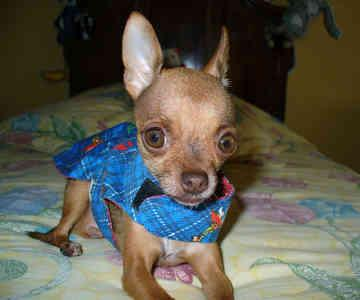

In [ ]:
from IPython.display import Image
Image(Path("Images",train_file_list[0]))

# Hooray, It's our doggo!

# Exploring the images folder

# How to visualize a group of random images

In [ ]:
# Get a list of all images folder
image_folders = os.listdir("Images")
image_folders[:10]

['n02098286-West_Highland_white_terrier',
 'n02089867-Walker_hound',
 'n02100236-German_short-haired_pointer',
 'n02088094-Afghan_hound',
 'n02096585-Boston_bull',
 'n02113799-standard_poodle',
 'n02099849-Chesapeake_Bay_retriever',
 'n02104029-kuvasz',
 'n02097298-Scotch_terrier',
 'n02110185-Siberian_husky']

#Excellent!

Now let's make a dictionary that maps from the folder name to a simplified version of the class name, for example:

In [ ]:
# Create folder name -> class name dict
folder_to_class_name_dict = {}
for folder_name in image_folders:
  # Turn folder name into class_name
  # E.g. "n02089078-black-and-tan_coonhound" -> "black_and_tan_coonhound"
  # We'll split on the first "-" and join the rest of the string with "_" and then lower i

  class_name = "_".join(folder_name.split("-")[1:]).lower()
  folder_to_class_name_dict[folder_name] = class_name

# Make sure there are 120 entries in the dictionary
assert len(folder_to_class_name_dict)== 120

Now with the folder name to class name mapping created, let's view the first 10 to make sure it works.

In [ ]:
list(folder_to_class_name_dict.items())[:10]

[('n02098286-West_Highland_white_terrier', 'west_highland_white_terrier'),
 ('n02089867-Walker_hound', 'walker_hound'),
 ('n02100236-German_short-haired_pointer', 'german_short_haired_pointer'),
 ('n02088094-Afghan_hound', 'afghan_hound'),
 ('n02096585-Boston_bull', 'boston_bull'),
 ('n02113799-standard_poodle', 'standard_poodle'),
 ('n02099849-Chesapeake_Bay_retriever', 'chesapeake_bay_retriever'),
 ('n02104029-kuvasz', 'kuvasz'),
 ('n02097298-Scotch_terrier', 'scotch_terrier'),
 ('n02110185-Siberian_husky', 'siberian_husky')]

# Perfect!!


In [ ]:
dog_names = sorted(list(folder_to_class_name_dict.values()))
dog_names[:10]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle']

# Now we've got:

1.   folder_to_class_name_dict - a mapping from the folder name to the class name

2.   dog_names - a list of all the unique dog breeds we're working with



How about we follow the data explorers' motto of visualize, visualize, visualize, and view some random images to make sure they are correct?

To help us visualize, let's create a function that takes in a list of image paths and then randomly selects 10 of those paths to display.

The function will:



1.   Take in a select list of image paths
2.   Crate a grid of matplotlib plots(e.g. 2x5=10 plots to plot on)

1.   Randomly sample 10 image paths from the imput image path list
    (using random.sample)
2.   iterate through the flattened axes via axes.flat which is a reference
     to the attribute numpy.ndarray.flat
3.   extract the sample path from the list of samples



1.   Get the sample title from the parent folder of the path using      Path.parent.stem() and then extract the formatted dog breed name by indexing folder_to_class_name_dict
2.   Read the image with with plt.imread() and show it on the target ax
     wiht ax.imshow()



1.   Set the title of the plot to the parent folder name with ax.   set_title() and turn the axis("off")(this makes for pretty plots)
2.   show the plot with plt.show()












In [ ]:
import random
from typing import List

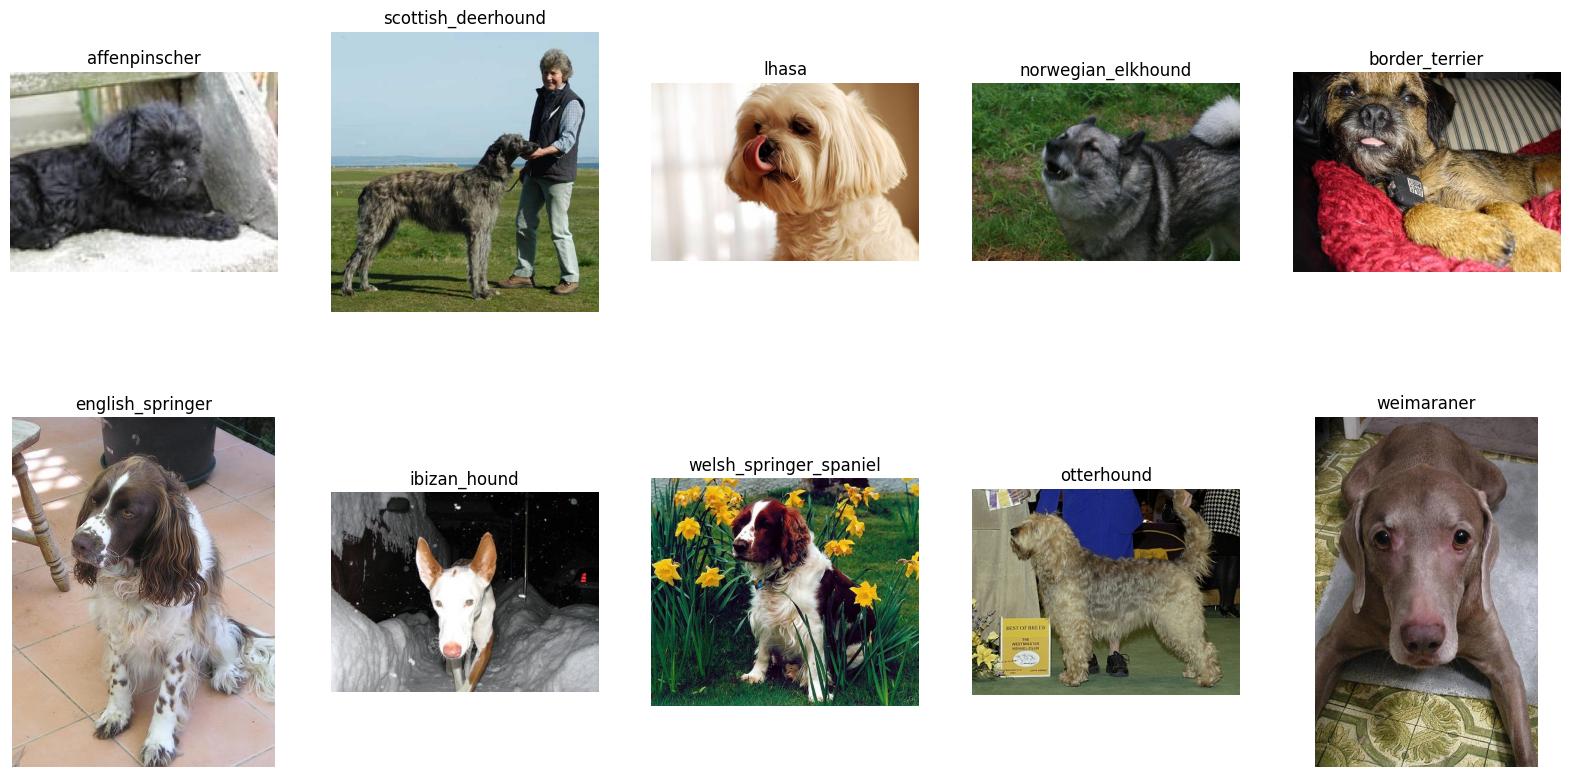

In [ ]:
import random

from pathlib import Path
from typing import List

import matplotlib.pyplot as plt

#1. Take in a select list of image paths
def plot_10_random_images_from_path_list(path_list: List[Path],extract_title: bool=True) -> None:
  #2. set up a grid of plots
  fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

  #3. Randomly sample 10 paths from the list
  samples = random.sample(path_list, 10)

  #4. iterate through the flattened axes and corrospoding sample paths
  for i, ax in enumerate(axes.flat):

    #5. Get the target sample path (e.g. "Images/n02087394-Rhodesian_ridgeback/n02087394_1161.jpg")
    sample_path = samples[i]

    #6. Extract the parent directory name to use as the title(if necessary)
    # (e.g. n02087394-Rhodesian_ridgeback/n02087394_1161.jpg -> n02087394-Rhodesian_ridgeback -> rhodesian_ridgeback)
    if extract_title:
      sample_title = folder_to_class_name_dict[sample_path.parent.stem]
    else:
      sample_title = sample_path.parent.stem             # bug:Path

    #7. Read the image file and plot it on the corrosponding axis
    ax.imshow(plt.imread(sample_path))

    # 8. Set the title of the axis and turn of the axis (for pretty plots)
    ax.set_title(sample_title)
    ax.axis("off")

  #9. Display the plot
  plt.show()

plot_10_random_images_from_path_list(path_list=[Path("Images")/Path(file) for file in train_file_list])






# Hence Proved

Those are some nice looking dogs! Not only that, but each name correlates with the correct type of dog also, so, we know this works.

(As a rule of thumb, I would probably repeat this maybe 10 times, so that I can examine 100 or so images, and make sure it's still giving me the correct data. This way, I know it's working before moving too far down the line).

# How to explore the distribution of our data
After visualization, another valuable way to explore the data is by checking the data distribution.

What do I mean by this?

Well, distribution refers to the "spread" of data, and in our case, it’s ‘how many images of dogs do we have per breed?’. So, a balanced distribution would mean having roughly the same number of images for each breed (e.g. 100 images per dog breed).

Right now there are 120 breeds and 1200 images, so it's a good guess that this might be the case, but we’re better off checking.

Also, it's worth noting that there's also a deeper level of distribution than just images per dog breed that we want to check.

In [ ]:
# ceate a dictionary of image counts
from typing import List,Dict

#1. Take in a target dictionary
def count_images_in_subdirs(target_dictionary: str) -> List[Dict[str,int]]:
  """
  Counts the number of JPEG images in each subdirectory of the given directory
  Each subdirectory is assumed to represent a class, and the function counts
  the number of '.jpg' files within each one. The result is a list of
  dictionaries with the class name and corresponding image count.

  Args:
  target_directory (str): The path to the directory containing subdirectories.

  Returns:
      List[Dict[str, int]]: A list of dictionaries with 'class_name' and 'image_count' for each subdirectory.

  Examples:
      >>> count_images_in_subdirs('/path/to/directory')
      [{'class_name': 'beagle', 'image_count': 50}, {'class_name': 'poodle', 'image_count': 60}]
  """
  # 2. Create a list of all the subdirectoires in the target directory (these contain our images)
  images_dir = Path("/content/Images")                # ERROR SUBFOLDER
  image_class_dirs = [directory for directory in images_dir.iterdir() if directory.is_dir()]
  #3. Create an empty list to image counts to
  image_class_counts = []
  #4. iterate through all of the subdirectories
  for image_class_dir in image_class_dirs:

    #5. Get the class name from image directory (e.g. "Images/n02116738-African_hunting_dog" -> "n02116738-African_hunting_dog")
    class_name = image_class_dir.stem

    #6. Count the number of images in the target subdirectory
    image_count = len(list(image_class_dir.rglob("*.jpg")))

    #7. Append a dictionary of class name and image count to count list
    image_class_counts.append({"class_name": class_name,
                                   "image_count": image_count})
   #8. Return the list
  return image_class_counts


# Ho! ho, what a function!

In [ ]:
image_class_counts = count_images_in_subdirs("Images")
image_class_counts[:3]

[{'class_name': 'n02098286-West_Highland_white_terrier', 'image_count': 169},
 {'class_name': 'n02089867-Walker_hound', 'image_count': 153},
 {'class_name': 'n02100236-German_short-haired_pointer', 'image_count': 152}]

# It works!

Better yet, since our image_class_counts variable is in the form of a list of dictionaries, we can turn it into a pandas DataFrame.

# Why do this!

Mainly because **a pandas DataFrame helps provide a structured and tabular format that is easy to manipulate and analyze**. Not only that, but it also has built-in methods for sorting, filtering, and aggregating data, which simplifies data handling and enhances readability.

Alright, so now let's sort the DataFrame by "image_count" so the classes with the most images appear at the top. To do this we can use DataFrame.sort_values().

In [ ]:
# Create a dataframe
import pandas as pd
image_counts_df = pd.DataFrame(image_class_counts).sort_values(by="image_count", ascending = False)
image_counts_df.head()

class_name  image_count
22          n02085936-Maltese_dog          252
3          n02088094-Afghan_hound          239
35   n02092002-Scottish_deerhound          232
113          n02112018-Pomeranian          219
80              n02111889-Samoyed          218

In [ ]:
# Make class name column EASIER to READ
image_counts_df["class_name"] = image_counts_df["class_name"].map(folder_to_class_name_dict)
image_counts_df.head()

class_name  image_count
22          maltese_dog          252
3          afghan_hound          239
35   scottish_deerhound          232
113          pomeranian          219
80              samoyed          218

# Creating Training and Test data split directories

After exploring the data, one of the next best things you can do is create experimental data splits.

This includes:

The good news is that our dog dataset already comes with specified training and test set splits, so we'll stick with those.

But we'll also create a smaller training set (a random 10% of the training data) so we can stick to the **machine learning engineers' motto of experiment, experiment, experiment!** and run quicker experiments.

So, let's write some code to create this:


*   images/train/  directory to hold all of the training images
*   images/test/ directory to hold all of the testing images

*   and make a directory inside each of images/train and images/test for each of the dog breed classes.

We can make each of the directories we need using Path.mkdir()






In [ ]:
from pathlib import Path

# Define the target directory to for image splits to go
images_split_dir = Path("images_split")

# Define the training and test directories
train_dir = images_split_dir/"train"
test_dir = images_split_dir/"test"

# Using Path.mkdir with exist_ok = True ensures the directory is created only if it doesn't exist
train_dir.mkdir(parents=True,exist_ok=True)
test_dir.mkdir(parents=True,exist_ok=True)
print(f"Directory {train_dir} is exists.")
print(f"Directory {test_dir} is exists.")

# Make a folder for each dog name
for dog_name in dog_names:
  # making training dir folder
  train_class_dir = train_dir/dog_name
  train_class_dir.mkdir(parents=True,exist_ok=True)
  # print(f" Makein directory : {train_class_dir}")

  # Making testing dir folder
  test_class_dir = test_dir/dog_name
  test_class_dir.mkdir(parents=True,exist_ok=True)
  # print(f" Makein directory : {train_class_dir}")

assert count_subfolders(train_dir) == len(dog_names)   # Error(bug) found here
assert count_subfolders(test_dir) == len(dog_names)

Directory images_split/train is exists.
Directory images_split/test is exists.


# Excellent!


Now we can check out the data split directories/folders we created them by inspecting them in the files panel in google colab.

Alternatively, we can check the names of each by listin the subdirectories inside them.

In [ ]:
sorted([str(dir_name) for dir_name in train_dir.iterdir() if dir_name.is_dir()])[:10]


['images_split/train/affenpinscher',
 'images_split/train/afghan_hound',
 'images_split/train/african_hunting_dog',
 'images_split/train/airedale',
 'images_split/train/american_staffordshire_terrier',
 'images_split/train/appenzeller',
 'images_split/train/australian_terrier',
 'images_split/train/basenji',
 'images_split/train/basset',
 'images_split/train/beagle']

Our directory layout is looking good, but you might've noticed that all of our dog breed directories are empty, so let's change that by getting some images in there.

To do so, we'll create a function called copy_files_to_target_dir() which will copy images from the Images directory into their respective directories inside images/train and images/test.

More specifically, it will:

1. Take in a list of source files to copy (e.g. train_file_list) and a target directory to copy files to

2. Iterate through the list of source files to copy (we'll **use tqdm which comes installed with Google Colab** to create a progress bar of how many files have been copied)

3. Convert the source file path to a Path object

4. Split the source file path and create a Path object for the destination folder (e.g. "n02112018-Pomeranian" -> "pomeranian")

5. Get the target file name (e.g. "n02112018-Pomeranian/n02112018_6208.jpg" -> "n02112018_6208.jpg")

6. Create a destination path for the source file to be copied to (e.g. **images_split/train/pomeranian/n02112018_6208.jpg**).

7. Ensure the destination directory exists, similar to the step we took in the previous section (you can't copy files to a directory that doesn't exist)

8. Print out the progress of copying (if necessary)

9. Copy the source file to the destination using Python's **shutil.copy2(src, dst)**





In [ ]:
"""
Copies a list of files from the images directory to a target directory.
Parameters:
file_list (list[str]): A list of file paths to copy.
target_dir (str): The destination directory path where files will be copied.
images_dir (str, optional): The directory path where the images are currently stored. Defaults to 'Images'.
verbose (bool, optional): If set to True, the function will print out the file paths as they are being copied. Defaults to False.

    Returns:
    None

"""

"\nCopies a list of files from the images directory to a target directory.\nParameters:\nfile_list (list[str]): A list of file paths to copy.\ntarget_dir (str): The destination directory path where files will be copied.\nimages_dir (str, optional): The directory path where the images are currently stored. Defaults to 'Images'.\nverbose (bool, optional): If set to True, the function will print out the file paths as they are being copied. Defaults to False.\n\n    Returns:\n    None\n\n"

In [ ]:
from pathlib import Path
from shutil import copy2
from tqdm.auto import tqdm

#1. Take in a list of source files to copy and a target directory
def copy_files_to_target_dir(file_list : list[str],
                                   target_dir : str,
                                   images_dir : str = "Images",
                                   verbose: bool = False) -> None:

                                   #2. Iterate through source files
                                   for file in tqdm(file_list):
                                    #3. Convert file path to a Path list
                                    source_file_path = Path(images_dir) / Path(file)
                                    #4. split the file path and create a Path object for the destination folder
                                    # e.g. "n02112018-Pomeranian" -> "pomeranian"
                                    file_class_name = folder_to_class_name_dict[Path(file).parts[0]]
                                    #5. Get the name of the target image
                                    file_image_name = Path(file).name
                                    #6. Create the destination path
                                    destination_file_path = Path(target_dir) / file_class_name / file_image_name
                                    #7. Ensure the destination directory exists (this is a safety check, can't copy an image to a file that doesn't exist)
                                    destination_file_path.parent.mkdir(parents = True, exist_ok = True)
                                    #8. Print out copy message if necessary
                                    if verbose:
                                       print(f"[info] Copying: {source_file_path} to {destination_file_path}")
                                    # 9. Copy the original path to the destination path
                                    copy2(src=source_file_path, dst = destination_file_path)




And just like that, our copying function is created!

Let's test it out by copying the files in the train_file_list to train_dir.

In [ ]:
copy_files_to_target_dir(file_list=train_file_list,
                         target_dir=train_dir,
                         verbose=False)

  0%|          | 0/12000 [00:00<?, ?it/s]

# Woohoo!

How about we do the same for test_file_list and test_dir ?

In [ ]:
copy_files_to_target_dir(file_list=test_file_list,
                         target_dir=test_dir,
                         verbose=False)

  0%|          | 0/8580 [00:00<?, ?it/s]

# Nice!


We’ve now got 8,580 testing images copied from Images to images_split/test/.

So now let's write some code to check that the number of files in the train_file_list is the same as the number of images files in train_dir (and the same for the test files).

In [ ]:
# Get list of all .jpg paths in train and test image directories
train_image_paths = list(train_dir.rglob("*.jpg"))
test_image_paths = list(test_dir.rglob("*.jpg"))

# Make sure the number of images in the training and test directoriesequals the number for files
assert len(train_image_paths) == len(train_file_list)
assert len(test_image_paths) == len(test_file_list)

print(f"Number of images in {train_dir}: {len(train_image_paths)}")
print(f"Number of images in {test_dir}: {len(test_image_paths)}")

Number of images in images_split/train: 12000
Number of images in images_split/test: 8580


# It seems to have **worked !**

# but let’s make sure to adhere to the data explorers' motto of visualize, visualize, visualize!,

and **Plot** some random images from the train_image_paths list, to double check.

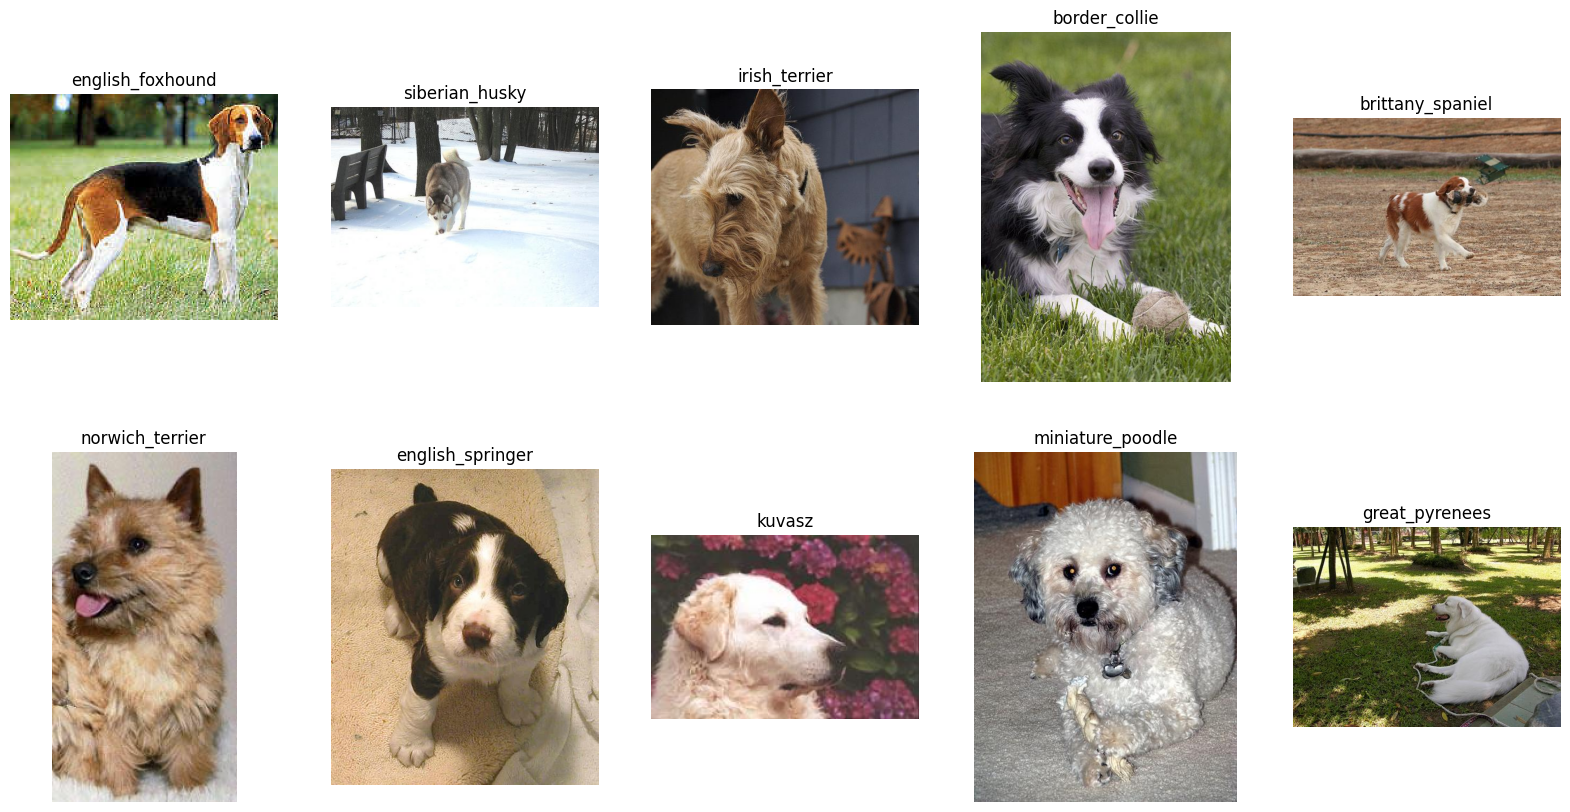

<function __main__.plot_10_random_images_from_path_list(path_list: List[pathlib.Path], extract_title: bool = True) -> None>

In [ ]:
plot_10_random_images_from_path_list(path_list=train_image_paths,
                                     extract_title=False) # Don't need to extract the title since the image directories are already named simple
plot_10_random_images_from_path_list

# How to make a 10% training dataset split

Now we're going to make another training split that contains a random 10% (approximately 1,200 images, since the original training set has 12,000 images) of the data from the original training split.

# Why do this?

Well, although it's true that machine learning models generally perform better with more data, having more data often means longer computation times, and longer computation times means the time between our experiments gets longer, which is not what we want in the beginning.

# In the beginning of any new machine learning project, your focus should be to reduce the amount of time between experiments as much as possible.

# Why???

# Fundaaa!

# Because like I said earlier, running more experiments means you can figure out what doesn't work. And if you figure out what doesn't work, you can start working closer towards what does.

Once you **find** something that does work, you can then start to **scale up** your experiments with more data, bigger models, longer training times, etc.

# So, here is how to do this.

To make our 10% training dataset, let's copy a random 10% of the existing training set to a new folder called images_split/train_10_percent, so that we've got the layout:

In [ ]:
# Create train_10_percent directory
train_10_percent_dir = images_split_dir / "train_10_percent"
train_10_percent_dir.mkdir(parents=True,exist_ok=True)

Now we should have 3 split folders inside images_split.

In [ ]:
os.listdir(images_split_dir)

['train', 'test', 'train_10_percent']

# And it works!

So now let's create a list of random training sample file paths using Python's random.sample() function.

We'll want the total length of the list to equal 10% of the original training split, so to make things reproducible, we'll use a random seed (this is not 100% necessary, it just makes it so we get the same 10% of training image paths each time).

In [ ]:
import random

# set a ranodm seed
random.seed(42)

# Get a 10% sample of the training image paths
train_image_paths_random_10_percent = random.sample(population= train_image_paths,k=int(0.1*len(train_image_paths)))

# check how many image paths we got
print(f"Original number of training image paths:{len(train_image_paths)}")
print(f"Number of 10% training image paths: {len(train_image_paths_random_10_percent)}")
print(f"First 5 random 10% training image paths:")

train_image_paths_random_10_percent[:5]

Original number of training image paths:12000
Number of 10% training image paths: 1200
First 5 random 10% training image paths:


[PosixPath('images_split/train/miniature_poodle/n02113712_6384.jpg'),
 PosixPath('images_split/train/italian_greyhound/n02091032_12013.jpg'),
 PosixPath('images_split/train/english_springer/n02102040_1244.jpg'),
 PosixPath('images_split/train/rhodesian_ridgeback/n02087394_11442.jpg'),
 PosixPath('images_split/train/black_and_tan_coonhound/n02089078_3078.jpg')]

# Random 10% training image paths acquired!

So now let's copy them to the images_split/train_10_percent directory using a similar code to our copy_files_to_target_dir() function.

In [ ]:
# Copy training 10% split images from images_split/train/ to images_split/train_10_percent/...
for source_file_path in tqdm(train_image_paths_random_10_percent):

  # Create the destination file path
  destination_file_and_image_name = Path(*source_file_path.parts[-2:])  # "images_split/train/yorkshire_terrier/n02094433_2223.jpg" -> "yorkshire_terrier/n02094433_2223.jpg"
  destination_file_path = train_10_percent_dir / destination_file_and_image_name # "yorkshire_terrier/n02094433_2223.jpg" -> "images_split/train_10_percent/yorkshire_terrier/n0209

  # if the target directory doesn't exist, make it.
  target_class_dir = destination_file_path.parent
  if not target_class_dir.is_dir():
    # print(f"Making directory:{target_class_dir}")
    target_class_dir.mkdir(parents=True,
                           exist_ok=True)
  # print(f"Copying: {sourcef_file_path} to {destination_file_path}")
  copy2(src=source_file_path,
        dst=destination_file_path)




  0%|          | 0/1200 [00:00<?, ?it/s]

# 1200 images copied!

Now let's check our training 10% set distribution and make sure we've got some images for each class.

We can use our count_images_in_subdirs() function to count the images in each of the dog breed folders in the train_10_percent_dir.

In [ ]:
# Count images in train_10_percent_dir

train_10_percent_image_class_counts = count_images_in_subdirs(train_10_percent_dir)
train_10_percent_image_class_counts_df = pd.DataFrame(train_10_percent_image_class_counts).sort_values("image_count",ascending=True) # COLM = image_count
train_10_percent_image_class_counts_df.head()

class_name  image_count
17               n02090379-redbone          148
106             n02086079-Pekinese          149
24   n02102973-Irish_water_spaniel          150
7                 n02104029-kuvasz          150
41              n02105162-malinois          150

# Hmmm Okay......

checking the length of the train_10_percent_image_class_counts_df

In [ ]:
# How many subfolders are there?
print(len(train_10_percent_image_class_counts_df))

120


# Beautiful!

our training 10% dataset split has a folder for each of the dog breed classes.





# Note: Ideally our random 10% training set would have the **same distribution **per class as the original training set.

However, for this example, we've taken a global random 10% rather than a random 10% per class. This is okay for now, however for more fine-grained tasks, you may want to make sure your smaller training set is better distributed.

# How to plot the distribution of your training set

# READ or Write VERTICALLY or COLUMN wise to make it fast.

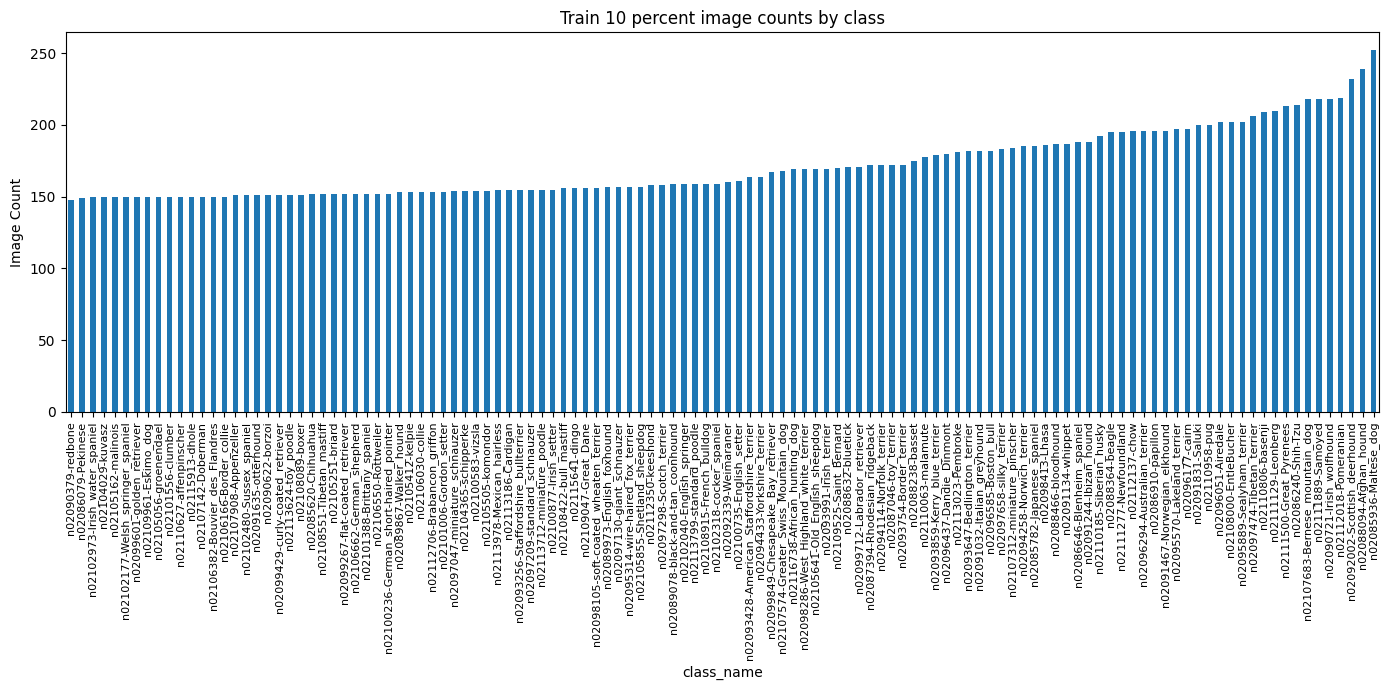

In [ ]:
# Plot distribution of train 10% dataset
plt.figure(figsize=(14,7))
train_10_percent_image_class_counts_df.plot(kind="bar",
                                            x="class_name",
                                            y="image_count",
                                            legend=False,
                                            ax=plt.gca()) # "get plt.gca", get the plt we setup above and put the data there
# Add Customization
plt.title("Train 10 percent image counts by class")
plt.ylabel("Image Count")
plt.xticks(rotation=90, # Rotate the X labels for better visibility
           fontsize=8)  # Make the font size smaller for easier Reading
plt.tight_layout()
plt.show()

# Excellent! Our 10% training dataset distribution looks similar to the original training set distribution.

# Step#5: Turning Dataset into TensorFlow dataset

Alright, we've spent a bunch of time getting our dog images into different folders, but how do we get the images from different folders into a **machine learning model**?

Well, we need a way to **turn our images into numbers**.

Or more specifically, we're going to **turn our images into tensors**, which is where the "Tensor" comes from in "TensorFlow".

# So what are tensors exactly?

# A tensor is simply a **way to represent** something using **numbers**.

The things they represent can be almost anything you can think of, such as text, images, audio, rows, and columns), and there are several different ways to load data into TensorFlow.

However, the basic formula is the same across each data type. You have data -> use TensorFlow to turn it into tensors.

**This is the main reason why** we spent time **getting our data into the standard image classification format** (where the class name is the folder name),** because TensorFlow includes several utility functions** to load data from this directory format.

# What is a tf.data.Dataset??

A tf.data.Dataset is Tensorflow's way to efficient store a potentially large set of elements, thanks to the tf.data.Dataset API.

Because it's such an efficient method, it's what we are going to use for our dog images

And, since we are working with images, as well with
# tf.keras.utils.image_dataset_from_directory(), We'll also pass in the following parameters:

*   directory(folder) = directory is the target directory we'd like to turn into a tf.  data.Dataset

*   label_mode = the kind of labels we would like to use, in our case it is "categorical" since we are dealing **multi-class classification PROBLEM**
(We would use "binary" if we are dealing with binary classification problem)

*   batch_size = the number of images we'd like our model to see at a time(due to computation limitations, our model won't be able to look at every image at once so we split them into small batches and the models looks at each image individually), generally 32 is a good value to start, as this means our model will look at 32 images at a time (this number is flexible)

*   image_size = the size we 'd like to shape our images to before we feed them to our model (height x width)

*   shuffle = whether we'd like our dataset to be shuffled to randomize the order.
*   seed = if we are shuffling the order in a random fashion,do we want them to be reproducible?









# Note:
Values such as batch_size and image_size are known as hyperparameters, meaning they are values that you can decide what to set them as.

As for the best value for a given hyperparameter, that depends highly on the data you're working with, problem space and compute capabilities you've got available. **Best to experiment!**

With all this being said, let's see it in practice!

# Creating our own tf.data.Dataset

We'll make 3 of these tf.data.Dataset's:



*   Train_10_percent_ds
*   train_ds, and
*   Test_ds

Here’s the code to make this happen:








In [ ]:
import tensorflow as tf

# Creat constants
IMG_SIZE = (224,224)
BATCH_SIZE = 32
SEED  = 42

# Create train 10% dataset
train_10_percent_ds = tf.keras.utils.image_dataset_from_directory(
    directory =train_10_percent_dir,
    label_mode ="categorical", # turn label into one-hot representations (e.g. [0, 0, 1, ..., 0, 0])
    batch_size =BATCH_SIZE,
    image_size =IMG_SIZE,
    shuffle =True, # shuffle training datasets to prevent learning of order
    seed=SEED
)

# Create full train dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle =True,
    seed=SEED
)

# Create test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=False,  # don't need to shuffle the test dataset (this makes evaluations easier)
    seed=SEED
)



Found 1200 files belonging to 120 classes.
Found 12000 files belonging to 120 classes.
Found 8580 files belonging to 120 classes.


# Note:

If you're working with similar styles of data (e.g. all dog photos), it's best practice to shuffle training datasets to prevent the model from learning any order in the data. Sneaky machines eh!

Alright, so now that we have our tf.data.Datasets created, let's check out one of them.

In [ ]:
train_10_percent_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.float32, name=None))>

You'll notice a few things going on here.

Essentially, we've got a collection of tuples:

The image tensor(s) - TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None) where (None, 224, 224, 3) is the shape of the image tensor (None is the batch size, (224, 224) is the IMG_SIZE we set and 3 is the number of color channels, as in, **red, green, blue or RGB** since our images are in color)

The label tensor(s) - TensorSpec(shape=(None, 120), dtype=tf.float32, name=None) where None is the batch size and 120 is the number of labels we're using

The batch size often appears as None since it's flexible and can change on the fly

Each batch of images is associated with a batch of labels

Instead of just talking about these, let's check out what a single batch looks like.

# We can do so by turning the tf.data.Dataset into an iterable with Python's built-in iter() and then getting the "next" batch with next().

In [ ]:
# What does a single batch look like?
image_batch,label_batch = next(iter(train_ds))
image_batch.shape,label_batch.shape


(TensorShape([32, 224, 224, 3]), TensorShape([32, 120]))

As you can see, we get back a single batch of images and labels.

Not only that, but it also looks like we have a single image_batch with a shape of [32, 224, 224, 3] ([batch_size, height, width, colour_channels]), and our labels have a shape of [32, 120] ([batch_size, labels]).

So what does this all mean?

Simply put, these are the numerical representations of our data images and labels!

# Note:

The shape of a tensor does not necessarily reflect the values inside a tensor. The shape only reflects the dimensionality of a tensor. For example, [32, 224, 224, 3] is a 4-dimensional tensor. Values inside a tensor can be any number (positive, negative, 0, float, integer, etc) representing almost any kind of data.

We can further inspect our data by looking at a single sample.

In [ ]:
# Get a single sample from a single batch
print(f"Single image tensor:\n {image_batch[0]}\n")
print(f"Single label tensor:\n{label_batch[0]}") # Notice the 1 is the index of the target label(our labels are one hot encoded)
print(f"Single sample class name: {dog_names[tf.argmax(label_batch)[0]]}")

Single image tensor:
 [[[196.61607  174.61607  160.61607 ]
  [197.84822  175.84822  161.84822 ]
  [200.       178.       164.      ]
  ...
  [ 60.095097  79.75804   45.769207]
  [ 61.83293   71.22575   63.288315]
  [ 77.65755   83.65755   81.65755 ]]

 [[196.       174.       160.      ]
  [197.83876  175.83876  161.83876 ]
  [199.07945  177.07945  163.07945 ]
  ...
  [ 94.573715 110.55229   83.59694 ]
  [125.869865 135.26268  127.33472 ]
  [122.579605 128.5796   126.579605]]

 [[195.73691  173.73691  159.73691 ]
  [196.896    174.896    160.896   ]
  [199.       177.       163.      ]
  ...
  [ 26.679413  38.759026  20.500835]
  [ 24.372307  31.440136  26.675896]
  [ 20.214453  26.214453  24.214453]]

 ...

 [[ 61.57369   70.18976  104.72547 ]
  [189.91965  199.61607  213.28572 ]
  [247.26637  255.       252.70387 ]
  ...
  [113.40158   83.40158   57.40158 ]
  [110.75214   78.75214   53.752136]
  [107.37048   75.37048   50.370483]]

 [[ 61.27007   69.88614  104.42185 ]
  [188.93079  1

# And boom! we have got a numerical representation of a dog image (in the form of red,green,blue pixel values)!

This is exactly the kind of format we want for our model.

But can we this reverse this process to check that it worked correctly (So instead of image to numbers, can we go from numbers back to an image?)

You bet we can!

# How to visualize images from our TensorFlow dataset

OK, so now let's turn our single sample from a tensor format, back to an image format.

We can do so by passing the single sample image tensor to matplotlib's plt.imshow() (we'll also need to convert its datatype from float32 to uint8 to avoid matplotlib color range issues).


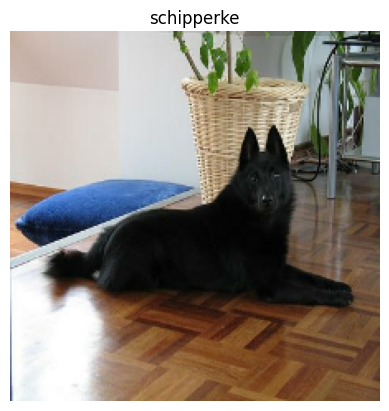

In [ ]:
plt.imshow(image_batch[0].numpy().astype("uint8"))
plt.title(dog_names[tf.argmax(label_batch[0])])
plt.axis("off");

# It works!

We went from dog image and classification to numbers (a tensor), and then back again.

As you know by now though, we don’t want to accept just one result. We want to check a larger sample for peace of mind, so let’s do that now.

# How to plot multiple images from our tensor data

We can do this by first setting up a plot with multiple subplots, and then iterate through our dataset with tf.data.Dataset.take(count=1).

This will "take" 1 batch of data (in our case, one batch is 32 samples) which we can then index on for each subplot.

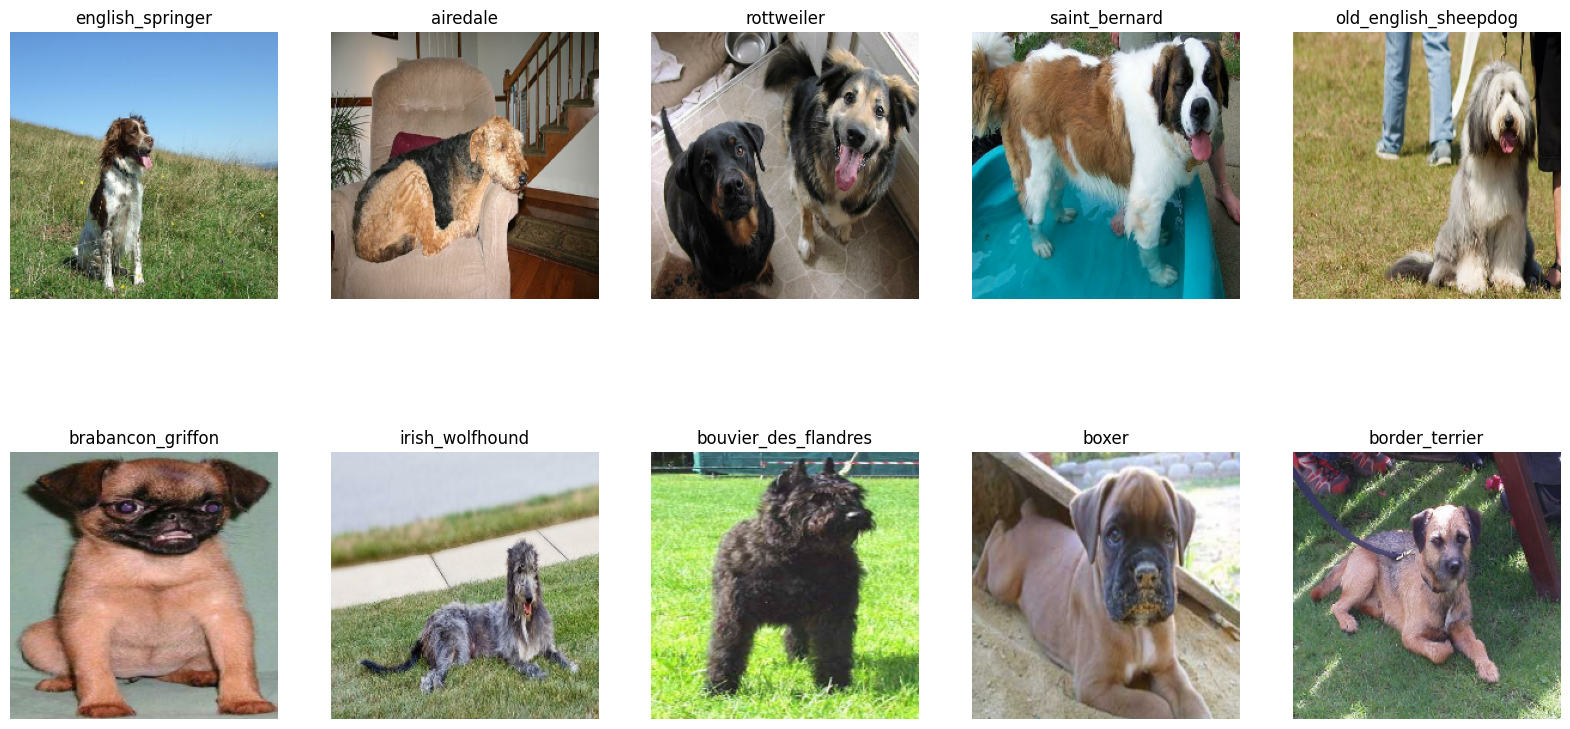

In [ ]:
# create multipe subplots
fig,axes = plt.subplots(nrows=2,
                        ncols=5,
                        figsize=(20,10))

for images,labels in train_ds.take(count=1):
  for i,ax in enumerate(axes.flat):
    ax.imshow(images[i].numpy().astype("uint8"))
    ax.set_title(dog_names[tf.argmax(labels[i])])
    ax.axis("off")


# How to get labels from our TensorFlow Dataset

Since our data is now in the tf.data.Dataset format, there are a couple of important attributes we can pull from it if we wanted to.

The first that I recommend, is the collection of filepaths associated with a tf.data.Dataset These are accessible by the .file_paths attribute.

# Note:
 You can often see a list of associated methods and attributes of a variable/class in Google Colab (or other IDEs) by pressing TAB afterwards (e.g type variable_name. + TAB).

In [ ]:
# Get the first file paths of the training dataset
train_ds.file_paths[:5]

['images_split/train/boston_bull/n02096585_1753.jpg',
 'images_split/train/kerry_blue_terrier/n02093859_855.jpg',
 'images_split/train/border_terrier/n02093754_2281.jpg',
 'images_split/train/rottweiler/n02106550_11823.jpg',
 'images_split/train/airedale/n02096051_5884.jpg']

In [ ]:
train_10_percent_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.float32, name=None))>

In [ ]:
class_names = train_ds.class_names
class_names[:5]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier']

Finally, we can also make sure that the class names are the same across our datasets by comparing them, with the following code:

In [ ]:
assert set(train_10_percent_ds.class_names) == set(train_ds.class_names) == set(test_ds.class_names)

# Configuring our datasets for performance

There's one last step we're going to do before we build our first TensorFlow model, and that's to configure our datasets for performance.

# Why?

## Simply because data loading is one of the biggest bottlenecks in machine learning!

 Sure, modern GPUs can perform calculations (matrix multiplications) to find patterns in data quite quickly. However, for the GPU to perform such calculations, the data needs to be there to be used, and that’s where the time sink is.

Good news for us is that if we follow the TensorFlow best practices for tf.data, **TensorFlow** will **take care** of all these **optimizations** and **hardware acceleration** for us.

# We're going to call three methods on our dataset to optimize it for performance:





*   cache()- Cache the elements in the dataset in memory or a target folder(speeds up loading)
*   shuffle()- Shuffle a set number of samples in preparation for loading (this will mean our samples and batches of samples will be reshuffled), for example,setting shuffle (buffer_size=1000) will prepare and shuffle 1000 elements of data at a a time, and

*   prefetch()- prefetch the next batch of data and prepare it for computation
whilst the previous one is being computed on(can scale to multiple prefetches depending on hardware availability).
Tensorflow can automatically configure how many elements/batches to prefetch by setting
**prefetch(buffer_sixe=tf.data.Autotune)**






In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_10_percent_ds = train_10_percent_ds.cache().shuffle(buffer_size=10*BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.cache().shuffle(buffer_size=100*BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# OPTIMIZED!

And just like that, our dataset is performance optimized!

So what’s next?
Congratulations on sticking with me this far, as I know this was a fairly large guide dedicated to just one aspect of our project process (and every ML project to be honest).

This task really is so important when it comes to machine learning and deep learning workflows. Not only in terms of making sure that your data is accurate and set up correctly, but also optimized. (Any time you can make it faster, you 100% should!)

You now have a solid understanding of data acquisition, exploration, preparation, and turning into a Tensorflow dataset. Great work 😉.

In the next part of this guide, we’ll create our first neural network with TensorFlow, so make sure to subscribe via the link below so you don’t miss it. (Coming soon!)



> # TensorFlow_Computer_Vision_Model_Part2_Transfer_Learning



---



---



---



---



In [ ]:
# Create the input shape to our model
INPUT_SHAPE = (*IMG_SIZE,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=True,
    include_preprocessing=True,
    weights="imagenet",
    input_shape=INPUT_SHAPE
)


29403144/29403144 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 56, 56,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 56, 56,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 56, 56,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 56, 56,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 56, 56,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 56, 56,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 56, 56,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 56, 56,    │          0 │ block2b_expand_b

 Total params: 7,200,312 (27.47 MB)

 Trainable params: 7,139,704 (27.24 MB)

 Non-trainable params: 60,608 (236.75 KB)

# Woah!

Look at all those layers... this is what the "deep" in deep learning means! A deep number of layers.

How about we count the number of layers?

In [ ]:
# Create a base model with No TOP
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top = False,
    include_preprocessing = True,
    weights = "imagenet" ,         # bug:"imageNet" N
    input_shape = INPUT_SHAPE
)

#Check the output shape
base_model.output_shape

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(None, 7, 7, 1280)

In [ ]:
# Count the number of layers
print(f"Numbers of layers in base_model: {len(base_model.layers)}")

Numbers of layers in base_model: 270


# 273 layers!

# Wow, there's a lot going on.

Rather than step through each layer and explain what's happening in each layer, I'll leave that for the curious mind to research on their own.

Just know that when starting out deep learning you don't need to know what's happening in every layer in a model to be able to use a model.

For now, let's pay attention to a few things:



*   The **input layer**(the first layer) input shape, this will tell us the shape of the data the model expects as input
*   The **output layer**(the last layer) output shape, this will tell us the shape of the data the model will output.
*   The **number of parameters** of the model, these are "learnable" numbers(also called weights) that a model will use to **drive patterns** and **represent the data.**
Generally, the **more parameters** a model has, the **more learning capacity** it has.
* The **number of layers** a model has.Generally, the **more layers** a model has ,the **more learning capacity** it has(**each layer** will **learn **progressively **deep patterns** from the data).However this **caps out** at a certain range





So let’s break these down.

# Understanding model input and output shapes

One of the most important practical steps in using a deep learning model is input and output shapes.

# Two questions to ask:

> What is the shape of my input data?


> What is the ideal shape of my output data?







# We ask about **shapes** because in all deep learning models input and output data comes in the form of tensors.

This goes for text, audio, images and more.

# The raw data gets converted to a numerical representation first before being passed to a model.

In [ ]:
base_model.input_shape

(None, 224, 224, 3)

# Nice!

It looks like our model's input shape is where we want it.

### Remember **None**
in this case is equivalent to a wild card dimension, meaning **it could be any value**, but we've set ours to 32.

In [ ]:
# check the model's output shape
base_model.output_shape

(None, 7, 7, 1280)

# Hmm, is this what we're after?
No, not really. You see, since we have **120 dog classes** in our dataset, we'd ideally **like** an **output shape of (None, 120)**.

# So then why is it by default (None, 1000)?

Well, this is because the model has been **trained already on ImageNet**, a dataset **of 1,000,000+ image**s with **1000 classes** (hence the 1000 in the output shape).

# Changing the output shape

# Oh no, we get an error!

# So what does this mean?

Well, what this is saying is that if we want to keep using the pretrained 'imagenet' weights (which we do so that we can leverage the visual patterns/features that the model has already learned on ImageNet), then we need to change the parameters to the base_model.

# How to change our base model parameters

So, what's we are going to do is **create our own top layers**, we can do this by setting **include_top = True**

what this means is that we"ll use most of the **model's existing layers** to **extract features** and **patterns out of our images**, but then **customize** the **final few layers** to our **own problem**



> # This kind of transfer learning is called feature extraction.



It’s a **setup** where you **use an existing model's pretrained weights to extract features** (or patterns) for your **own custom data**. You can then **use** those **extracted features **and further **tailor them to your own use case**.

In [ ]:
# Create a base model with No TOP
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top = False,
    include_preprocessing = True,
    weights = "imagenet" ,         # bug:"imageNet" N
    input_shape = INPUT_SHAPE
)

#Check the output shape
base_model.output_shape

(None, 7, 7, 1280)

# Hmm, so what's going on here with this new output shape?

This still **isn't** what we want, because we're after **(None, 120)** for our number of dog classes.

So how about we **check** the number of layers again?

In [ ]:
# Count the number of layers in base model
print(f"Number of layers in base model is: {len(base_model.layers)}")

Number of layers in base model is: 270




> Looks like our new base_model has **fewer layers** than our previous one.





> This is because we used **include_top=False**.





> This means we've still got **270 base layers** to **extract features and patterns from our image**s, however, it also means we get to **customize** the output layers to our liking.



We'll come back to this shortly.

# How to **change** our base model parameters





> So, what we're going to do is **create** our own **top layers**, and we can do this by setting **include_top=False**.





> What this means is that we'll use most of the **model's existing layers** to **extract features and patterns** out of our images, but then **customize the final few layers to our own problem**.





> This kind of **transfer learning** is called **feature extraction**.



It’s a setup where you use an existing model's pretrained weights to extract features (or patterns) from your own custom data. You can then use those extracted features and further tailor them to your own use case.

In [ ]:
# Create a base model with no top
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False, # don't include the top layer (we want to make our own top layer)
    include_preprocessing=True,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
)

# Check the output shape
base_model.output_shape

(None, 7, 7, 1280)

In [ ]:
# Count the number of layers
print(f"Number of layers in base_model: {len(base_model.layers)}")

Number of layers in base_model: 270


Looks like our new base_model has fewer layers than our previous one.

This is because we used include_top=False.

This means we've still got 270 base layers to extract features and patterns from our images, however, it also means we get to customize the output layers to our liking.

We'll come back to this shortly.



> # Understanding model parameters



In **traditional programming**, the **developer** ** explicitly defines** the **rules or algorithms** that** manipulate** the input data to produce the desired output. However, **in machine learning**, the **process is different and essentially reversed.**

# In machine learning:

1. **Inputs and Outputs:** You provide the model with a set of inputs (e.g., images of dogs) and the corresponding ideal outputs (e.g., labels indicating that the images are of dogs)

2. **Training:** The model then uses this data to learn the relationship between the inputs and the outputs. During training, the model makes predictions and adjusts its internal parameters based on the difference between its predictions and the actual outputs

3. **Learning:** Through iterative adjustments (using techniques such as gradient descent), the model identifies patterns and develops its own rules for mapping inputs to outputs. These learned rules are not explicitly programmed but are derived from the data itself

4. **Inference:** Once trained, the model can take new, unseen inputs and predict the outputs based on the rules it has learned

# **In essence**,

machine learning involves providing the model with examples of the desired output for given inputs, allowing it to then learn the underlying patterns and rules needed to replicate that relationship.

This process allows the model to generalize from the training data to new data it hasn't seen before.



> A model's **parameters** are the **learned rules**, and **learned is the key word here**.





> In an **ideal setup**, we **never tell the model** what parameters to learn. **Instead, it learns them itself** by **connecting input data to labels in supervised learning** and by **grouping together similar samples in unsupervised learning.**



# Note:



> **Parameters are values learned by a model** whereas **hyperparameters** (e.g. batch size) are **values set by a human**.





> **Parameters** also get referred to as **"weights" or "patterns" or "learned features" or "learned representations"**.



Generally, the **more parameters a model has**, the m**ore capacity it has to learn**. While each layer in a deep learning model will have a specific number of parameters (these vary depending on which layer you use).

The **benefit** of using a **preconstructed model and transfer learning** is that **someone else has done the hard work** in **finding what combination of layers** leads to a good set of parameters (**a big thank you** to these wonderful people).

# How to count the parameters in our pretrained model

In [ ]:
# check the number of parameters
base_model.count_params()

5919312

# Wow!

That means each time an image goes through our model, it will be influenced in some small way by 5,919,312 numbers.

Each one of these is a potential learning opportunity (except for parameters that are non-trainable but we'll get to that soon too).

Now, you may be thinking, **5 million+ parameters sounds like a lot**, and it is.

However, many modern large scale models, such as **GPT-3 (175B) and GPT-4 (200B+?** the actual number of parameters was never released) deal in the billions of parameters (Note: this is written in 2024, so if you're reading this in future, parameter counts may be in the trillions).

Generally, **more parameters** leads to better models, however, there are always **trade offs**.

**More parameters** means **more compute power** to run the models.

**In practice**, if you have **limited compute power** (e.g. a single GPU on Google Colab which is what we used), then it's **best to start** with **smaller models** and **gradually increase the size** when necessary.


We can get the **trainable and non-trainable parameters** from our model with the **trainable_weights and non_trainable_weights attributes**.



# Remember:

> **parameters** are also referred to as **weights**



# Note:

> **Trainable weights** are **parameters** of the model which are **updated by backpropagation** during training (they are changed to better match the data). Whereas **non-trainable weights** are **parameters** of the model which are **not updated by backpropagation** during training (they are fixed in place).



 # How to count the trainable and non trainable parameters in your model

In [ ]:
# check the number of parameters
base_model.count_params()

5919312

In [ ]:
import numpy as np

def count_Parameters(model, print_output=True):
  """
  Counts the number of trainable, non-trainable and total parameters of a given model.
  """
  trainable_parameters = np.sum([np.prod(layer.shape) for layer in model.trainable_weights])
  non_trainable_parameters = np.sum([np.prod(layer.shape) for layer in model.non_trainable_weights])
  total_parameters         = trainable_parameters + non_trainable_parameters
  if print_output:
    print(f"Model {model.name}parameter counts:")
    print(f"Total parameters: {total_parameters}")
    print(f"Trainable parameters: {trainable_parameters}")
    print(f"Non-trainable parameters: {non_trainable_parameters}")
  else:
    return total_parameters, trainable_parameters, non-trainable_parameters

count_Parameters(model=base_model, print_output=True)


Model efficientnetv2-b0parameter counts:
Total parameters: 5919312
Trainable parameters: 5858704
Non-trainable parameters: 60608


# Nice!

It looks like our function worked, and most of our model's parameters are trainable.

This means they will be tweaked as they see more images of dogs.



> However, a **standard practice in transfer learning** is to f**reeze the base layers** of a model and **only train the custom top layers to suit your problem**.



# Note:



> In this image the **EfficientNetB0 architecture** is being **demonstrated**, however we're going to be using the **EfficientNetV2B0 architecture** which is **slightly different**. I've **simply used the older architecture** image from the research paper as a newer one wasn't available.



**In other words**, keep the patterns an existing model has learned on a similar problem (if they're good) to form a base representation of an input sample and then manipulate that base representation to suit our needs.

# So why do this?

# Simply because it's faster. The less trainable parameters, the faster your model training will be, and the faster your experiments will be.

# But how will we know this works?

Well, we're going to run experiments to test it…

# How to freeze the parameters of our base model

# Okay, so how do we freeze the parameters of our base_model?

We can set its .trainable attribute to False.

In [ ]:
# freeze the base model
base_model.trainable=False
base_model.trainable

False

This means that our **base_model is now frozen**, so let's check how this affected the number of trainable and non-trainable parameters.

In [ ]:
count_Parameters(model=base_model,print_output=True)

Model efficientnetv2-b0parameter counts:
Total parameters: 5919312.0
Trainable parameters: 0.0
Non-trainable parameters: 5919312


# Beautiful!

All of the parameters in our base_model are now **non-trainable (frozen)**, which **means** they **won't be updated** during training.

# How to pass data through our model




> We've spoken a couple of times about how our base_model is a **"feature extractor" or "pattern extractor"**,
# but what does this mean?



It means that when a data sample goes through the base_model, its numbers get **manipulated** into a compressed set of features.

In other words, the layers of the model will each perform a calculation on the sample eventually leading to an output tensor with patterns the model has **deemed most important**.



> This is often referred to as a **‘compressed feature space’**, and it's one of the **central ideas of deep learning**.



# For example

If we take a large input such as an image tensor of shape [224, 224, 3]) and compress it into a smaller output such as a feature vector of shape [1280]) that captures a useful representation of the input. **3D to 2D to 1D**

# Note:




> A **feature vector** is also referred to as an **embedding**. This is basically a **compressed representation** of a data sample that makes it useful.





> The **concept of embeddings** is **not limited to images** either, the concept of embeddings **stretches across all data types (text, images, video, audio + more**).



# We've **stumbled** upon **one of the most common errors** in machine learning, which is **shape errors**.

In our case, the shape of the data we're trying to put into the model doesn't match the input shape the model is expecting.

Our input data shape is (224, 224, 3) ((height, width, colour_channels)), however, our **model is expecting** (None, 224, 224, 3) ((batch_size, height, width, colour_channels)).

# Fixing our shape error

We can fix this error by adding a singular batch_size dimension to our input and thus make it (1, 224, 224, 3) (a batch_size of 1 for a single sample).

To do so, we can use the **tf.expand_dims(input=target_sample, axis=0)** where target_sample is our input tensor and axis=0 means we want to expand the first dimension.

In [ ]:
# Current image shape
shape_of_image_without_batch = image_batch[0].shape

# Adda batch dimension to our single image
shape_of_image_with_batch = tf.expand_dims(input=image_batch[0], axis=0).shape

print(f"Shape of image without batch: {shape_of_image_without_batch}")
print(f"Shape of image with batch: {shape_of_image_with_batch}")

Shape of image without batch: (224, 224, 3)
Shape of image with batch: (1, 224, 224, 3)


# Perfect!

Now let's pass this image with a batch dimension to our base_model.

In [ ]:
# Extract features from a single image using our base model
feature_extraction = base_model(tf.expand_dims(image_batch[0], axis =0))
feature_extraction

<tf.Tensor: shape=(1, 7, 7, 1280), dtype=float32, numpy=
array([[[[-2.19177082e-01, -3.44185606e-02, -1.40321627e-01, ...,
          -1.44454509e-01, -2.73809791e-01, -7.41251782e-02],
         [-8.69670585e-02, -6.48750588e-02, -2.14547202e-01, ...,
          -4.57206406e-02, -2.77900130e-01, -8.20886344e-02],
         [-2.76872933e-01, -8.26781392e-02, -3.85151207e-02, ...,
          -2.72129059e-01, -2.52802223e-01, -2.28106007e-01],
         ...,
         [-1.01603933e-01, -3.55146267e-02, -2.23026931e-01, ...,
          -2.26227745e-01, -8.61772522e-02, -1.60451025e-01],
         [-5.87607436e-02, -4.65544593e-03, -1.06193364e-01, ...,
          -2.87548564e-02, -9.06914845e-02, -1.82624385e-01],
         [-6.27618283e-02, -1.38620916e-03,  1.52700013e-02, ...,
          -7.85450079e-03, -1.84584662e-01, -2.62404889e-01]],

        [[-2.17334077e-01, -1.10280894e-01, -2.74605244e-01, ...,
          -2.22405359e-01, -2.74738282e-01, -1.01998910e-01],
         [-1.40700579e-01, -1.6

# Woah! Look at all those numbers!

After passing through **~270 layers**, this is the **numerical representation** our model has created of our input image.

You might be thinking, okay, there's a lot going on here, how can I possibly understand all of them?



> Well, **with enough effort**, you might. However, **these numbers are more for a model/computer to understand** than for a **human to understand**, so **don’t worry** about them.



# How to check the shape of your feature_extraction

In [ ]:
# Check the shape of feature extraction
feature_extraction.shape

TensorShape([1, 7, 7, 1280])

Ok, it looks like our model has compressed our input image into a lower dimensional feature space.

# Note:



> Feature space (or latent space or **embedding** space) is a numerical region where pieces of data are represented by tensors of various dimensions. Feature space is hard for humans to imagine because it could be 1000s of dimensions (humans are only good at imagining 3-4 dimensions at max).



> But you can think of **feature space** as an area **where numerical representations of similar items will be close together**. If the feature space was a grocery store, one breed of dogs may be in one aisle (similar numbers) whereas another breed of dogs may be in the next aisle. You can see an example of a large embedding space representation of 8M Stack Overflow questions on Nomic Atlas.







> We've stumbled upon **one of the most common errors** in machine learning, which is **shape errors**.



In our case, the shape of the data we're trying to put into the model doesn't match the input shape the model is expecting.

Our input data shape is (224, 224, 3) ((height, width, colour_channels)), however, our **model is expecting** (None, 224, 224, 3) ((batch_size, height, width, colour_channels)).

Fixing our shap

# Fixing our shape error

We can fix this error by adding a singular batch_size dimension to our input and thus make it (1, 224, 224, 3) (a batch_size of 1 for a single sample).

To do so, we can use the **tf.expand_dims**(input=target_sample, axis=0) where target_sample is our input tensor and axis=0 means we want to expand the first dimension.

In [ ]:
# Current image shape
shape_of_image_without_batch = image_batch[0].shape

# Add a batch dimension to our single image
shape_of_image_with_batch = tf.expand_dims(input=image_batch[0], axis=0).shape

print(f"Shape of image without batch: {shape_of_image_without_batch}")
print(f"Shape of image with batch: {shape_of_image_with_batch}")


Shape of image without batch: (224, 224, 3)
Shape of image with batch: (1, 224, 224, 3)


# Perfect!

In [ ]:
# Extract features from a single image using our base model
feature_extraction = base_model(tf.expand_dims(image_batch[0], axis=0))
feature_extraction

<tf.Tensor: shape=(1, 7, 7, 1280), dtype=float32, numpy=
array([[[[-2.19177082e-01, -3.44185606e-02, -1.40321627e-01, ...,
          -1.44454509e-01, -2.73809791e-01, -7.41251782e-02],
         [-8.69670585e-02, -6.48750588e-02, -2.14547202e-01, ...,
          -4.57206406e-02, -2.77900130e-01, -8.20886344e-02],
         [-2.76872933e-01, -8.26781392e-02, -3.85151207e-02, ...,
          -2.72129059e-01, -2.52802223e-01, -2.28106007e-01],
         ...,
         [-1.01603933e-01, -3.55146267e-02, -2.23026931e-01, ...,
          -2.26227745e-01, -8.61772522e-02, -1.60451025e-01],
         [-5.87607436e-02, -4.65544593e-03, -1.06193364e-01, ...,
          -2.87548564e-02, -9.06914845e-02, -1.82624385e-01],
         [-6.27618283e-02, -1.38620916e-03,  1.52700013e-02, ...,
          -7.85450079e-03, -1.84584662e-01, -2.62404889e-01]],

        [[-2.17334077e-01, -1.10280894e-01, -2.74605244e-01, ...,
          -2.22405359e-01, -2.74738282e-01, -1.01998910e-01],
         [-1.40700579e-01, -1.6

# Woah! Look at all those numbers!

After passing through ~270 layers, this is the numerical representation our model has created of our input image.

You might be thinking, okay, there's a lot going on here, how can I possibly understand all of them?





> Well, **with enough effort**, you might. However, **these numbers are more for a model/computer to understand** than for a **human to understand**, so **don’t worry** about them.



# How to check the shape of your feature_extraction

In [ ]:
# Check shape of feature extraction
feature_extraction.shape

TensorShape([1, 7, 7, 1280])

In [ ]:
num_input_features = 224*224*3
feature_extraction_features = 1*7*7*1280

# Calculate the compression ratio
num_input_features / feature_extraction_features

2.4

Looks like our model has compressed the numerical representation of our input image by 2.4x so far.

But you might've noticed our feature_extraction is still a tensor, so how about we turn it into a vector and compress the representation even further?

# How to turn our tensor into a vector

We can do this by taking our feature_extraction tensor and pooling together the inner dimensions.



**By pooling**, I mean taking the **average or the maximum values**.



# Why?



Well, **because a neural network** often **outputs** a **large amount of learned feature values** but **many of them** can be **insignificant** compared to others.



> So taking the **average or the max** across them helps us to **compress the representation** further while **still preserving** the **most important features**.





This **process** is often referred to as:





> **Average pooling** - Take the average across given dimensions of a tensor, can perform with tf.keras.layers.GlobalAveragePooling2D()



> **Max pooling** - Take the maximum value across given dimensions of a tensor, can perform with tf.keras.layers.MaxPooling2D()





In [ ]:
# Turn feature extraction into a feature vector
feature_vector = tf.keras.layers.GlobalAveragePooling2D()(feature_extraction) # pass feature extraction to the pooling layer
feature_vector

<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=
array([[-0.115219  , -0.04476556, -0.1247655 , ..., -0.09118074,
        -0.08420829, -0.07769412]], dtype=float32)>

As you can see, we've compressed our feature_extraction tensor into a feature vector. (**Notice** the new shape of (1, 1280)).



> Now if you're **not sure** what **all these numbers mean**,** that's okay**. **I don't either**. All you need to know is that **a feature vector (also called an embedding)** is supposed to be a numerical representation that's meaningful to computers.



# How to check our vector shape

In [ ]:
# Check out the feature vector shape
feature_vector.shape

TensorShape([1, 1280])

We've **reduced** the shape of feature_extraction from (1, 7, 7, 1280) to (1, 1280).

What this means is we've gone from a tensor with **multiple dimensions to a vector with one dimension of size 1280(3D to 2D to 1D)**. Our neural network has performed calculations on our image and it is now represented by 1280 numbers.

# 3D to 2D to 1D



> This is one of the **main goals** of deep learning, to reduce higher dimensional information into a lower dimensional but still representative space.



In [ ]:
# Compare the reduction
num_input_features = 224*224*3
feature_extraction_features = 1*7*7*1280
feature_vector_features = 1*1280

print(f"Input -> feature extraction reduction factor: {num_input_features / feature_extraction_features}")
print(f"Feature extraction -> feature vector reduction factor: {feature_extraction_features / feature_vector_features }")
print(f"Input -> feature extraction -> feature vector reduction factor: {num_input_features / feature_vector_features}")


Input -> feature extraction reduction factor: 2.4
Feature extraction -> feature vector reduction factor: 49.0
Input -> feature extraction -> feature vector reduction factor: 117.6


That’s a 117.6x reduction from our original image to its feature vector representation!

# But why compress the representation like this?



> Because **representing** our data in a **compressed format but** still with **meaningful numbers** (to a computer) means that **less computation** is required to reuse the patterns.



# For example

Imagine you had to relearn how to spell words every time you wanted to use them.

Would this be **efficient?**

**Not at all**. Instead, you take a while to learn them at the start and then continually reuse this knowledge over time. This is the same with a deep learning model.

It learns representative patterns in data, figures out the ideal connections between inputs and outputs and then reuses them over time in the form of numerical weights.

# How to go from image to feature vector (practice time!)

We've covered a fair bit in the past few sections, so let's practice.

The important takeaway here is that one of the main goals of deep learning is to create a model that is able to take some kind of high dimensional data (e.g. an image tensor, a text tensor, an audio tensor) and extract meaningful patterns in it whilst compressing it to a lower dimensional form (e.g. a feature vector or embedding).

We can then use this lower dimensional form for our specific use cases, and one of the most powerful ways to do this is with transfer learning.

Taking an existing model from a similar domain to yours and applying it to your own problem.

To practice turning a data sample into a feature vector, let's start by recreating a base_model instance.



> This time, we can also add in a **pooling layer** automatically using pooling="avg" or pooling="max".



# Note:

I demonstrated the use of the tf.keras.layers.GlobalAveragePooling2D() layer because not all pretrained models have the functionality of a pooling layer being built-in.

In [ ]:
# Create a base model with no top and a pooling layer built-in
# pooling layer
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling="avg", # can also use max
    include_preprocessing= True,
)

# check the summary (optional)
# base_model.summary()

# check the output shape
base_model.output_shape

(None, 1280)

# Boom!

We get the same output shape from the base_model as we did when using it with a pooling layer thanks to using pooling="avg".

In [ ]:
# Freeze the base layer
base_model.Trainable = False

#count the parameters
count_Parameters(model=base_model,print_output=True)

Model efficientnetv2-b0parameter counts:
Total parameters: 5919312
Trainable parameters: 5858704
Non-trainable parameters: 60608




> And now we can pass an image through our base model and get a feature vector from it.



In [ ]:
# Get a feature vector of a single image (Don't forget to add a batch dimension)
feature_vector_2 = base_model(tf.expand_dims(image_batch[0], axis=0))
feature_vector_2

<tf.Tensor: shape=(1, 1280), dtype=float32, numpy=
array([[-0.115219  , -0.04476556, -0.1247655 , ..., -0.09118074,
        -0.08420829, -0.07769412]], dtype=float32)>

# Wonderful!

# Now is this the same as our original feature_vector?

Well, we can find out by comparing feature_vector and feature_vector_2 and seeing if all of the values are the same with **np.all()**.

In [ ]:
# Compare the 2 feature vectors
np.all(feature_vector == feature_vector_2)


np.True_

# Perfect, it worked!



> So now let's put it all together and **create a full model** for our dog vision problem.



# Step2: Creating a custom model for our dog vision problem

The main steps when creating any kind of deep learning model from scratch are:

1. Define the input layers
2. Define the middle layers
3. Define the output layers

These sound broad because they are. Deep learning models are almost **infinitely customizable**.

**Good news is**, thanks to transfer learning, **all of our middle layers are defined by base_model** (you could argue the input layer is created too).

So now it's up to us to define our input and output layers.

TensorFlow/Keras have two main ways of connecting layers to form a model.



> **The Sequential model **(tf.keras.Sequential) - Useful for making simple models with one tensor in and one tensor out, not suited for complex models


> **The Functional API** - Useful for making more complex and multi-step models but can also be used for simple models





Let's start with the Sequential model.

It takes a list of layers and will pass data through them sequentially.

Our base_model will be the input and middle layers and we'll use a **tf.keras.layers.Dense() layer as the output** (we'll discuss this shortly).

# Creating a model with the Sequential API

The Sequential API is the most straightforward way to create a model.

And because your model comes in the form of a list of layers from input to middle layers to output, each layer is executed sequentially.

In [ ]:
# Creating a sequential model
tf.random.set_seed(42)
sequential_model = tf.keras.Sequential([base_model,
                                        tf.keras.layers.Dense(units=len(dog_names),
                                                              activation="softmax")])
sequential_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)  │ (None, 1280)           │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       153,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 6,012,424 (22.94 MB)

 Non-trainable params: 60,608 (236.75 KB)

# Wonderful!

We've now got a model with 6,073,032 parameters, however, only 153,720 of them (the ones in the dense layer) are trainable.

Our **dense layer** (also called a **fully-connected layer or feed-forward layer**) takes the outputs of the base_model and performs further calculations on them to map them to our required number of classes (120 for the number of dog breeds).

We can now use **activation="softmax"** (the Softmax function) to get **prediction probabilities**. These are values between** 0 and 1** which **represent** **how much** our model **"thinks"** a specific image relates to a certain class.

# Sidenote:

There's another common **activation function called Sigmoid**, that we could use if we **only** had **two classes**, **for example, "dog" or "cat"**.

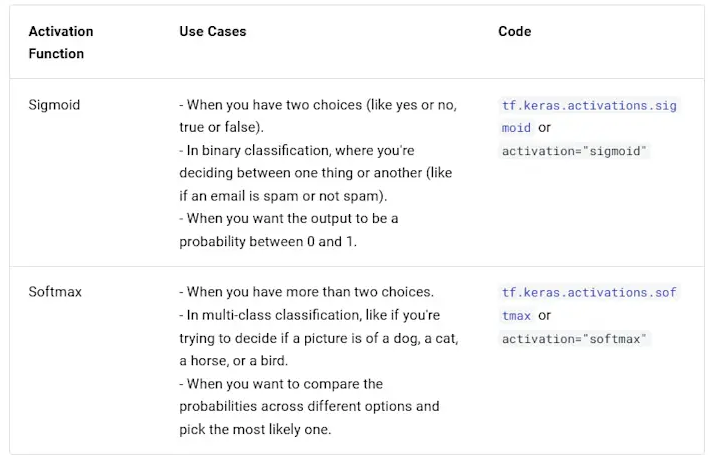

In [ ]:
sequential_model.input_shape

(None, 224, 224, 3)

In [ ]:
# check the output shape
sequential_model.output_shape

(None, 120)

Our sequential model takes in an image tensor of size [None, 224, 224, 3] and outputs a vector of shape [None, 120] where None is the batch size we specify.

In [ ]:
# Get a single image with a batch size of 1
single_image_input = tf.expand_dims(image_batch[0], axis=0)

# Pass the image through our model
single_image_output_sequential = sequential_model(single_image_input)

# check the output
single_image_output_sequential

<tf.Tensor: shape=(1, 120), dtype=float32, numpy=
array([[0.00802106, 0.00908258, 0.00883018, 0.01026696, 0.00843123,
        0.00957958, 0.00517857, 0.01093029, 0.00547727, 0.01090345,
        0.00561309, 0.00843112, 0.00433287, 0.00706384, 0.00958719,
        0.00695539, 0.00987885, 0.01132594, 0.01171485, 0.00553041,
        0.00534091, 0.00639401, 0.00523883, 0.00867432, 0.00882045,
        0.00952718, 0.00610817, 0.01654799, 0.00996408, 0.00562854,
        0.00485515, 0.01093738, 0.0071625 , 0.00678044, 0.00599143,
        0.0121987 , 0.01170429, 0.00796511, 0.00538274, 0.00589321,
        0.01081368, 0.00351897, 0.01325412, 0.00641123, 0.00769972,
        0.00901263, 0.00895913, 0.01242548, 0.00989015, 0.00674967,
        0.0099648 , 0.00746764, 0.00685054, 0.00947717, 0.01249475,
        0.00563017, 0.00640919, 0.00663366, 0.00389934, 0.00386911,
        0.00754006, 0.00698334, 0.00408979, 0.01112426, 0.00841393,
        0.00743302, 0.00841231, 0.00546593, 0.0118291 , 0.01392749

# Nice!

Our model has output a tensor of prediction probabilities in shape [1, 120], with one value for each of our dog classes.

And **thanks to the softmax function**, all of these **values are between 0 and 1** and they should **all add up to 1** (or close to it).

In [ ]:
# Sum the output
np.sum(single_image_output_sequential)

np.float32(0.99999994)

# Beautiful!

# So how do we figure out which of the values our model thinks is most likely?

Well, we take the index of the highest value!

# How to find the index of the highest value



> We can find the index of the highest value using **tf.argmax()** or by using **np.argmax()**.



We'll get the highest value (not the index) alongside it.


# Note

that **these values may change every time due to the model/data being randomly initialized**. Don't worry too much about them being different, **in machine learning randomness is a good thing**.

In [ ]:
# find the index with the highest value
highest_value_index_sequential_model_output = np.argmax(single_image_output_sequential)
highest_value_sequential_model_output = np.max(single_image_output_sequential)

print(f"Highest value index: {highest_value_index_sequential_model_output}({dog_names[highest_value_index_sequential_model_output]})")
print(f"Prediction Probablity: {highest_value_sequential_model_output}")


Highest value index: 96(scotch_terrier)
Prediction Probablity: 0.02172401174902916


**Hmm.** This prediction **probability** value is quite **low**.

**In this example**, the model predicts "minature_schauzer" with a very low confidence of about 2.34%. With the highest potential value being 1.0, this indicates that the model is not very confident in its prediction.

# Checking the original label

**Next**, let's verify the actual label for our single image to see if the model's prediction was accurate.

In [ ]:
# check the original lable value
print(f"Predicted value: {highest_value_index_sequential_model_output}")
print(f"Actual value: {tf.argmax(label_batch[0].numpy())}")

Predicted value: 96
Actual value: 95


Unfortunately, the model predicted the** wrong label**.

This **discrepancy is expected** because, although our model has pretrained parameters from ImageNet, the **dense layer added at the end is initialized with random parameters**. Therefore, initially, our model is essentially guessing the labels.

# Verifying predicted vs. actual labels

To complete the analysis, let's **compare** the text-based labels from the model's prediction and the original ground truth.

In [ ]:
# Index on class_names with our model's highest prediction probablity

sequential_model_predicted_label = class_names[tf.argmax(sequential_model(tf.expand_dims(image_batch[0],axis=0)),axis=1).numpy()[0]]

# Get the truth label
single_image_ground_truth_label = class_names[tf.argmax(label_batch[0])]

# Print predicted and ground truth labels
print(f"Sequential model predicted label: {sequential_model_predicted_label}")
print(f"Ground truth label: {single_image_ground_truth_label}")

Sequential model predicted label: scotch_terrier
Ground truth label: schipperke


Here, the model predicted "miniature_schnauzer," whereas the actual label was "toy_poodle."

This result confirms that our model's initial predictions are **not reliable due to the random initialization of the dense layer's parameters**.



**So what can we do?**

Well, we can **try another method** for creating a model!

# How to create a model with the Functional API

As mentioned before, the **Keras Functional API is another method for creating more complex models**.

It can include multiple different modeling steps, but **it can also be used for simple models**, and it's the way we'll construct our Dog Vision models going forward.

Let's recreate our sequential_model using the Functional API.



> We'll follow the **same process** as mentioned before:



1. Define the input layers

2. Define the middle/hidden layers.

3. Define the output layers.

4. **Bonus**: Connect the inputs and outputs within an instance of **tf.keras.Model()**.

In [ ]:
# Create an input layer
inputs = tf.keras.Input(shape=INPUT_SHAPE)

# Create hidden layer
x = base_model(inputs,training=False)

# Create the output layer
outputs = tf.keras.layers.Dense(units = len(class_names),
                                activation = "softmax",
                                name = "output_layer")(x)

# Connect the inputand output together
functional_model = tf.keras.Model(inputs=inputs,
                                  outputs=outputs,
                                  name="functional_model")
# Get a model_summary
functional_model.summary()

Model: "functional_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 1280)           │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 120)            │       153,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 6,012,424 (22.94 MB)

 Non-trainable params: 60,608 (236.75 KB)

Our functional model is now created so let's try it out.



It works in the same fashion as our sequential_model. (**But hopefully a little better!**).



In [ ]:
# Pass a single image through our functional_model
single_image_output_functional = functional_model(single_image_input)

# Find the index with the highest value
highest_value_index_functional_model_output = np.argmax(single_image_output_functional)
highest_value_functional_model_output = np.max(single_image_output_functional)

highest_value_index_functional_model_output, highest_value_functional_model_output

(np.int64(85), np.float32(0.01942254))

Looks like we got a **slightly different value to our sequential_model** (or they may be the **same if randomness wasn't so random**).



# Why is this?

Because our functional_model was initialized with a random tf.keras.layers.Dense layer, so the outputs of our functional_model are essentially random as well (neural networks start with random numbers and adjust them to better represent patterns in data).

Not to fear, we'll fix this soon when we train our model.

Right now we've created our model with a few scattered lines of code, so how about we functionize the model creation so we can repeat it later on?

# Functionizing model creation

We've created two different kinds of models so far. Each of which uses the same layers, except one was with the Keras Sequential API and the other was with the Keras Functional API.



> However, it would be **quite tedious to rewrite** that modeling **code every time** we wanted to create a new model right?





> **So let's create a function called create_model() to replicate the model creation step with the Functional API**.



# Note:

We're focused on the Functional API in this example, since it takes a bit more practice than the Sequential API.

In [ ]:
def create_model(include_top: bool = False,
                 num_classes: int = 1000,
                 input_shape: tuple[int,int,int] = (224,224,3),
                 include_preprocessing: bool = True,
                 trainable: bool = False,
                 dropout: float = 0.2,
                 model_name: str = "model") -> tf.keras.Model:

   """
   Create an EfficientNetV2 B0 fature extractor model with a custom classifier model.

   Args:
   include_top(bool,optional): whether to include the top(classifier) layers of the model
   num_classes (int, optional): Number of output classes for the classifier layer.
   input_shape (tuple[int, int, int], optional): Input shape for the model's images (height, width, channels).
   include_preprocessing (bool, optional): Whether to include preprocessing layers for image normalization.
   trainable (bool, optional): Whether to make the base model trainable.
   dropout (float, optional): Dropout rate for the global average pooling layer.
   model_name (str, optional): Name for the created model.

   Returns:
    tf.keras.Model: A Tensorflow model with the specified configuration.

   """

   # Create base model
   base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
        include_top=include_top,
        weights='imagenet',
        input_shape=None,
        pooling="avg",
        include_preprocessing=include_preprocessing
    )

   # Freeze the base model (if neceassary)
   base_model.trainable = trainable

   # Create input label
   inputs = tf.keras.Input(shape=input_shape,name="input_layer")

   # Create model BACKBONE (MIDDLE /HIDDEN layer)
   x = base_model(inputs,training=trainable)

   # Create Output layer
   outputs = tf.keras.layers.Dense(units = num_classes,
                                   activation = "softmax",
                                   name = "output_layer")(x)

   # Connect input and output layer
   model = tf.keras.Model(inputs=inputs,
                          outputs=outputs,
                          name=model_name)
   return model


# What a beautiful function!

Let's try it out

In [ ]:
# Create a model
model_0 = create_model(num_classes=len(class_names))
model_0.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 1280)           │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 120)            │       153,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

# Woohoo! Looks like it worked!

Now how about we inspect each of the layers and whether they're trainable?

In [ ]:
for layer in model_0.layers:
  print(layer.name,layer.trainable)

input_layer True
efficientnetv2-b0 False
output_layer True




> **Nice**, looks like our **base_model (efficientnetv2-b0) is frozen and not trainable**, while our **output_layer is trainable**.





> This means we'll be **reusing the patterns learned in the base_model to feed into our output_layer** and then **customizing those parameters to suit our own problem**.



 # LAST STEP: How to train a model on 10% of the training data (Model 0)

We've seen our model make a couple of predictions on our data, and so far it hasn't done so well. This is expected though, as our model is essentially predicting random class values given an image.

So let's change that by training the final layer on our model to be customized to recognizing images of dogs for our project.

We can do so via **five** steps:

1. Creating the model - We've done this ✅

2. Compiling the model - Here's where we'll tell the model how to improve itself and how to measure its performance

3. Fitting the model - Here's where we'll show the model examples of what we'd like it to learn (e.g. batches of samples containing pairs of dog images and their breed)

4. Evaluating the model - Once our model is trained on the training data, we can evaluate it on the testing data (data the model has never seen)

5. Making a custom prediction - Finally, the best way to test a machine learning model is by seeing how it goes on custom data. This is where we'll try to make a prediction on our own custom images of dogs

# Recreating our model (for clarity)

We’ve **done this already**, but for the interests of having this task all in one section, let's create our model using the create_model() function that we made earlier.

In [ ]:
# Create model
model_0 = create_model(num_classes=len(class_names),
                       model_name="model_0")
model_0.summary()

Model: "model_0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 1280)           │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 120)            │       153,720 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,073,032 (23.17 MB)

 Trainable params: 153,720 (600.47 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

# Compiling our model

After we've created our model, the next step is to compile it.



> We can compile our model_0 using the **tf.keras.Model.compile() method**.



There are many options we can pass to the compile() method, however, the main ones we'll be focused on are:

1. **The optimizer** - this tells the model how to improve based on the loss value

2. **The loss function** - this measures how wrong the model is (e.g. how far off are its predictions from the truth, an ideal loss value is 0, meaning the model is perfectly predicting the data)

3. **The metric(s)** - this is a human-readable value that shows how your model is performing, for example, accuracy is often used as an evaluation metric

# These three settings work together to help improve a model.

# Which optimizer should I use?

An optimizer tells a model how to improve its internal parameters (weights) to hopefully improve a loss value.



In most cases, **improving the loss means to minimize it** (a loss value is a **measure of how wrong your model's predictions** are, **a perfect model will have a loss value of 0**).

It does this through a process called **gradient descent.**

The gradients needed for gradient descent are calculated through **backpropagation,** a method that computes the gradient of the loss function with respect to each weight in the model.

Once the gradients have been calculated, the optimizer then tries to update the model weights so that they move in the opposite direction of the gradient (if you go down the gradient of a function, you reduce its value).



> If **you've never heard of the above processes, that's okay. TensorFlow implements many of them behind the scenes**.



For now, the main takeaway is that neural networks learn in the following fashion:

1. Start with random patterns/weights

2. Look at data (forward pass)

3. Try to predict data (with current weights)

4. Measure performance of predictions (loss function, backpropagation calculates gradients of loss with respect to weights)

5. Update patterns/weights (optimizer, gradient descent adjusts weights in the opposite direction of the gradients to minimize loss)

6. Look at data (forward pass)

7. Try to predict data (with updated weights)

8. Measure performance (loss function)

9. Update patterns/weights (optimizer)

10. Repeat all of the above X times

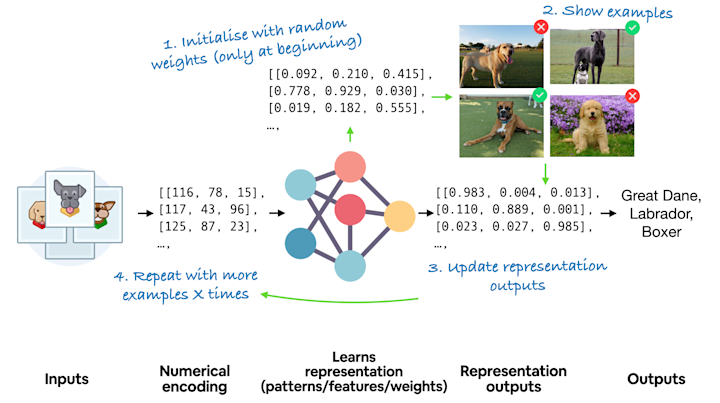

Here’s an example of **how a neural network learns**.

**Note the cyclical nature of the learning. You can think of it as a big game of guess and check, where the guess (hopefully) gets better over time.**

I'll leave the intricacies of **gradient descent and backpropagation** to your own extra-curricula research.

For now, we're **going to focus** on using the tools TensorFlow has to offer to **implement this process** instead.

As for optimizer functions, there are **two main options** to get started:

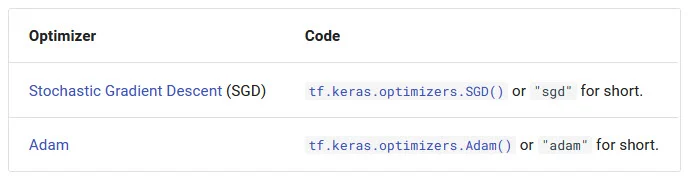

# Why these two?

Because they're the most often used in practice (you can see this via the number of machine learning papers referencing each one on paperswithcode.com).

There are many other optimizers available in the **tf.keras.optimizers** module too.

The good thing about **using a premade optimizer from tf.keras.optimizers is that they usually come with good starting settings**. One of the main ones being the **learning_rate value**.



> **The learning_rate is one of the most important hyperparameters to set in a neural network training setup.**





> **It determines how much of a step change the optimizer will adjust your model's weights every iteration. Too low and the model won't learn. Too high and the model will try to take too big of steps**.



**By default**, TensorFlow sets the learning rate of the Adam optimizer to 0.001 (**tf.keras.optimizers.Adam(learning_rate=0.001**)) which is a good setting for many problems to get started with.

We can also **set this default** with the shortcut **optimizer="adam"**

In [ ]:
# create optimizer
optimizer = "adam"

# The above line is the same as above
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer

# Which loss function should I use?

A loss function measures how wrong your model's predictions are.

# Why care?

Well, a model with poor predictions in comparison to the truth data will have a high loss value. Whereas a model with perfect predictions (e.g. it gets every prediction correct) will have a loss value of 0.

Different problems have different loss functions.

Some of the most common ones include:

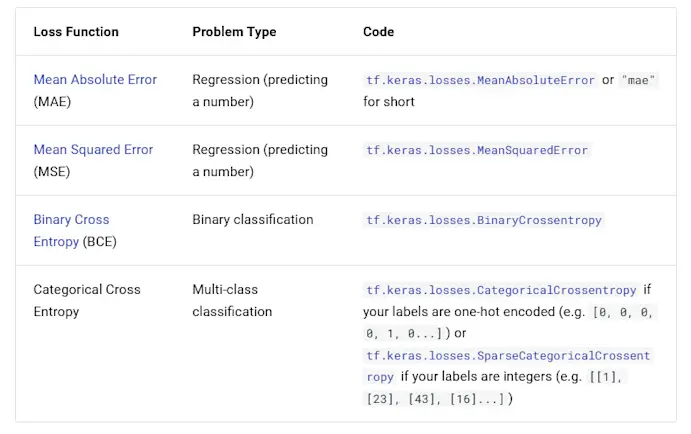



> **In our case**, since we're working with **multi-class classification** (multiple different dog breeds) and our labels are **one-hot encoded**, we'll be using **tf.keras.losses.CategoricalCrossentropy**.



We can leave all of the default parameters as they are as well.

However, **if we didn't have activation="softmax" in the final layer of our model**, we'd have to **change from_logits=False to from_logits=True** as the **softmax activation function does this conversion** for us.



> For now though, let's check out a single sample of our labels to make sure they're **one-hot encoded**.



In [ ]:
# check that our labels are one hot encoded
label_batch[0]

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)>

# Excellent! Looks like our labels are indeed one-hot encoded.

Now let's create our **loss function as tf.keras.losses**.CategoricalCrossentropy(from_logits=False) or "categorical_crossentropy" for short.

We set from_logits=False (this is the default) because our model uses activation="softmax" in the final layer so it's outputting prediction probabilities rather than logits. (Without activation="softmax" the outputs of our model would be referred to as logits, I'll leave this for your own extra-curricular investigation).

In [ ]:
# create our loss function
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False) # use from_logits = False if using an activation function in final layer of model
loss

<LossFunctionWrapper(<function categorical_crossentropy at 0x7d69721b7560>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

# Which metrics should I use?

The evaluation metric is a **human-readable value** which is used to see how well your model is performing.

(**A slightly confusing concept is that the evaluation metric and loss function can be the same equation**).

However, the main difference between a loss function and an evaluation metric is that the loss function will typically be differentiable. There are some exceptions to the rule but in most cases, the loss function will be differentiable, whereas, the evaluation metric does not have to be differentiable.

**In the case of regression** (predicting a number), your loss function and evaluation metric could be mean squared error (MSE).

Whereas in the **case of classification**, your** loss function** will generally be **binary cross entropy **(for two classes) or **categorical cross entropy** (for multiple classes) and your **evaluation metric(s) could be accuracy, F1-score, precision and/or recall**.


> # TensorFlow provides many pre-built metrics in the **tf.keras.metrics module**.



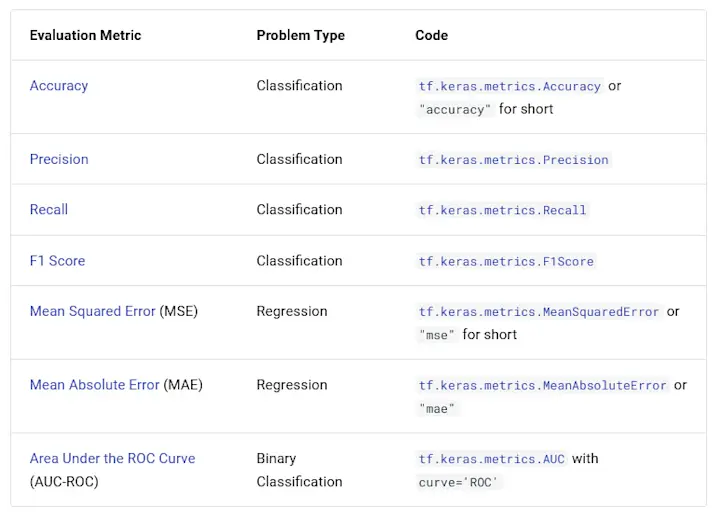

The **tf.keras.Model.compile()** method **expects the metrics parameter input** as a list.

# TL;DR

Since we're working with a classification problem, let's set up our evaluation metric as accuracy.

In [ ]:
# Create list of evaluation metrics
metrics = ['accuracy']

# Bonus: Want to learn more on how a model learns?



> We've briefly touched on optimizers, loss functions, gradient descent and backpropagation, which are the **backbone of neural network learning**.

---



---



---





# Putting it all together and compiling our model 0

# Phew!

We've been through all the main steps in compiling a model:

1. Creating the optimizer
2. Creating the loss function
3. Creating the evaluation metrics

In [ ]:
# Compile model with shortcuts (faster to write code but less customizable)
model_0.compile(optimizer="adam",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

# compile model with classes (will do the same as above)
model_0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=["accuracy"])


# Fitting a model on the data

Now that we have our model created and compiled, it’s time to fit it to the data.

This means we're going to pass all of the data that we have from Part 1 in this series (dog images and their assigned labels) through our model and ask it to try and learn the **relationship between the images and the labels**.

Fitting the model is step 3 in our list:

1. Creating the model - We've done this ✅

2. Compiling the model - We've done this ✅

3. Fitting the model - Here's where we'll show the model examples of what we'd like it to learn (e.g. the relationship between an image of a dog and its breed)

4. Evaluating the model - Once our model is trained on the training data, we can evaluate it on the testing data (data the model has never seen)

5. Making a custom prediction - Finally, the best way to test a machine learning model is by seeing how it goes on custom data. This is where we'll try to make a prediction on our own custom images of dogs

We can fit our model_0 instance with the **tf.keras.Model.fit() method**.

The main parameters of the fit() method we'll be paying attention to are:

x = What data do you want the model to train on?

y = What labels do you want your model to learn the patterns from your data to?

batch_size = The number of samples your model will look at per gradient update (e.g. 32 samples at a time before updating its internal patterns)
epochs = How many times do you want the model to go through all samples (e.g.

**epochs=5 means looking at all of the data 5 times**)?
validation_data = What data do you want to evaluate your model's learning on?

There are plenty **more options in the TensorFlow/Keras** documentation for the **fit() method**. However, these options will be more than enough for us.

In our case, let's keep our experiments quick and set the following:

**x=train_10_percent_ds** - Since we've crafted a tf.data.Dataset, our x and y values are combined into one. We'll also start by training on 10% of the data for quicker experimentation (if things work on a smaller subset of the data, we can always increase it).

**epochs=5** - The more epochs you do, the more opportunities your model has to learn patterns, however, it also prolongs training.

**validation_data=test_ds** - We'll evaluate the model's learning on the test dataset (samples it's never seen before).

Time to train our first neural network and bring Dog Vision 🐶👁️ to life!



> **Note:** If you don't have a GPU here, training will likely take a considerably long time.

You can activate a GPU in Google Colab by going to Runtime -> Change runtime type -> Hardware accelerator -> GPU. Note that changing a runtime type will mean you will have to restart your runtime and rerun all of the cells above, but it will take far less time to run.



In [ ]:
# fit model_0 for 5 epochs
epochs = 5
history_0 = model_0.fit(x=train_10_percent_ds,
                        epochs=epochs,
                        validation_data=test_ds)

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.1074 - loss: 4.4786 - val_accuracy: 0.5343 - val_loss: 3.1371
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step - accuracy: 0.7225 - loss: 2.4829 - val_accuracy: 0.6901 - val_loss: 1.9678
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - accuracy: 0.8785 - loss: 1.3180 - val_accuracy: 0.7534 - val_loss: 1.3701
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 239ms/step - accuracy: 0.9149 - loss: 0.8025 - val_accuracy: 0.7825 - val_loss: 1.0765
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - accuracy: 0.9478 - loss: 0.5412 - val_accuracy: 0.7950 - val_loss: 0.9261


# It looks like our model performed outstandingly well, and achieved a validation accuracy of ~80% after just 5 epochs of training!

# This is far better than the original Stanford Dogs paper results of 22% accuracy. (The paper that this project is based on).

# How did it perform so much better?

Well, that's the **power of transfer learning** combined with a series of modern updates to neural network architectures, hardware and training regimes.



> # TensorFlow_Computer_Vision_Model_Part3_Transfer_Learning

---

---



---







# Model Evaluation, Prediction, and Deployment with TensorFlow

# How this series works



> In the **first part of the series**, we **took the time to set up the project, get our data, explore it, create a training set, and then turn our data into a Tensorflow dataset**. This **is an essential skill** for any machine learning project, **but a fairly large task** - hence why it was a step on its own





> In the **second part of the series** we took the dataset that we created in Part 1 and used it to **build a neural network**, **train the model**, and then **fit the model** on the data





> Finally, in the **third part of this series**, (which you’re reading right now), we’ll **evaluate our model**, **make predictions**, and **work through the deployment phases**, which are crucial for understanding how to assess and utilize the trained models effectively



So let’s finish up this project!

# How to evaluate Model 0 on the test data

There are several ways to do this:

1. Look at the metrics (such as accuracy)

2. Plot the loss curves

3. Make predictions on the test set and compare them to the truth labels

4. Make predictions on custom samples (not contained in the training or test sets)



> (**Don’t worry** as we’ll get to custom images later on also).



# So what are loss curves?



> Loss curves visualize **how your model's loss value performs over time**. An **ideal loss curve will start high and move towards zero**. A **perfect model** will **have a loss value of zero**.



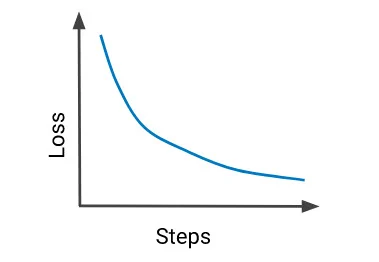

We say **loss "curves" as a plural** because you **can have a loss curve for each dataset, training, validation, and test**.

# How do we get a loss curve?

We have a few options.

1. We could manually plot the loss values output from our model training

2. We could programmatically get the values thanks to the History object. This is where the object is returned by the fit method of tf.keras.Model instances

The good news is that we've already got one, from the work we did in Part 2 of this series. It should be saved to history_0. (The model history for model_0)



> The **history.history attribute** contains a record of the training loss values and evaluation metrics for **each epoch**.



In [ ]:
# Inspect History.history attribute for model_0
history_0.history

{'accuracy': [0.24500000476837158,
  0.7441666722297668,
  0.8666666746139526,
  0.9150000214576721,
  0.9433333277702332],
 'loss': [4.053584575653076,
  2.20548152923584,
  1.2203631401062012,
  0.7641626596450806,
  0.529521644115448],
 'val_accuracy': [0.5342657566070557,
  0.6900932192802429,
  0.7533799409866333,
  0.7825174927711487,
  0.7949883341789246],
 'val_loss': [3.137054443359375,
  1.967812180519104,
  1.3700944185256958,
  1.0765244960784912,
  0.9261454939842224]}

# It works!! and we've got a history of our model training over time.

Not only that, but it looks like **everything is moving in the right direction**. **Loss is going down** whilst **accuracy is going up**, **which is the ideal outcome for our loss curves**.

So what now?

Well, how about we adhere to the **data explorer's motto** and write a function to **visualize, visualize, visualize!** so we can understand this data easier.

# How to plot your loss curves

We'll call the function **plot_model_loss_curves()** and we'll take a **History.history object as input** and then **plot loss and accuracy curves using matplotlib**, like so:

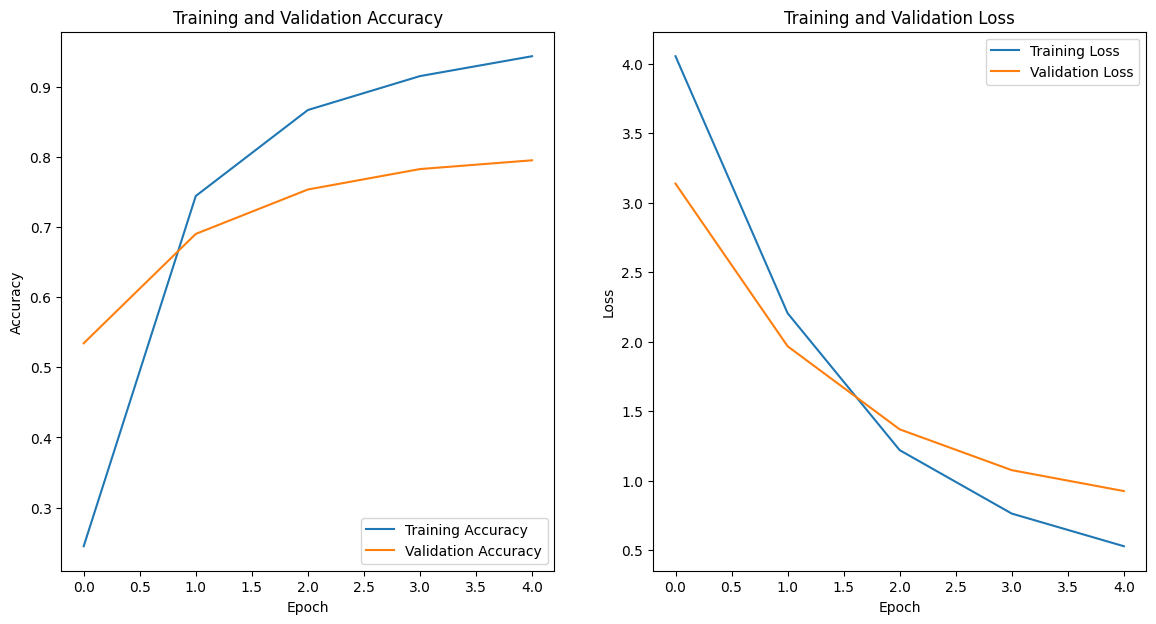

In [ ]:
def plot_model_loss_curves(history: tf.keras.callbacks.History) -> None:
  """
  Takes a History object and plots loss and accuracycurves.
  """
  # Get the accuracy values
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]

  # Get the loss values
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  # Get the number of epochs
  epochs_range = range(len(acc))

  #Create accuracy curves plot
  plt.figure(figsize=(14,7))
  plt.subplot(1,2,1)
  plt.plot(epochs_range, acc, label="Training Accuracy")
  plt.plot(epochs_range, val_acc, label="Validation Accuracy")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")

  # Create loss curves plot
  plt.subplot(1,2,2)
  plt.plot(epochs_range, loss, label="Training Loss")
  plt.plot(epochs_range, val_loss, label="Validation Loss")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")

  plt.show()

plot_model_loss_curves(history=history_0)

# Woohoo!

Now those are some nice-looking curves.

Our model is doing exactly what we'd like it to do. The accuracy is moving up while the loss is going down. However, you might be wondering why there's a gap between the training and validation loss curves, as ideally, the two lines would closely follow each other.

Well, in our case, the validation loss doesn't decrease as low as the training loss.



> This is known as **overfitting**, which is a **common problem in machine learning where a model learns the training data very well but doesn't generalize to other unseen data**.



# Overfitting and underfitting (for when your model doesn't perform how you'd like)

You can **imagine overfitting as an athlete who excels at running on a specific track with consistent conditions**.

**This athlete can achieve outstanding times as long as the track and weather conditions remain the same**. However, **when asked to run on a different track with varying conditions, their performance drops significantly because they haven't adapted to diverse scenarios**, such as heat or cold, or traction on the track



> On the other hand, **underfitting is like an athlete who performs poorly regardless of the track or conditions**. **They haven't trained adequately, so they can't achieve good results in any situation**.





> **Or in even simpler terms. One is great as long as it's the ideal conditions. One is poor quality regardless of conditions.**





> The **good news is that our model isn't underfitting**. In fact, it's **performing at ~80% accuracy on unseen data**. This means that **we must have overfitting issues**.



Now, there are a **lot of different ways to fix overfitting**. But one of the **best ways is to use more data**, and guess what - we've got plenty more!

# Remember

 (these results were achieved using only 10% of the training data).

However,** before we train a model with more data**, there's **another way to quickly evaluate our model** on a given dataset just to confirm these results, and that's **by using the tf.keras.Model.evaluate() method**.

So how about we try it on our model_0?

# Using the TensorFlow Keras evaluate() method

In [ ]:
# Evaluate model_0, see: https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
model_0_results = model_0.evaluate(x=test_ds)
model_0_results

269/269 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.8135 - loss: 0.8902


[0.9261454939842224, 0.7949883341789246]

As you can see, evaluating our model still shows **it's performing at ~80% accuracy despite only seeing 10% of the training data**.

In [ ]:
# Get our model's metrics names
model_0.metrics_names

['loss', 'compile_metrics']

# Model 1: How to train a model on 100% of the training data

Time to step it up a notch.

We've **trained a model on 10% of the training data** to see if it works and it did, so **now let's train a model on 100% of the training data** and see what happens

But before we do, what do you think will happen?



If our model was able to perform well on only 10% of the data, how do you think it will go on 100% of the data?

These types of questions are good to think about in the world of machine learning. After all, that's why **the machine learner's motto is experiment, experiment, experiment!**

So let's follow our three steps from before:

**Create a model** using our create_model() function

**Compile our model** (selecting our optimizer, loss function, and evaluation metric)

**Fit our model** (this time on 100% of the data for 5 epochs)

In [ ]:
#1. Create model_1 (next iternation of model_0)
model_1 = create_model(num_classes=len(class_names),
                       model_name = "model_1")

#2. Compile model
model_1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])

#3. fit model
epochs = 5
history_1 = model_1.fit(x = train_ds,
                        epochs = epochs,
                        validation_data = test_ds) # test_ds = test dataset

Epoch 1/5


# Woah! It looks like all that extra data helped our model quite a bit, it's now performing at close to ~90% accuracy on the test set.

# The question now, of course, is how many epochs should I fit for? Well, how about we evaluate our model_1?

# How to evaluate our Model 1 on the test data


In [ ]:
# Plot model_1 loss curves
plot_model_loss_curves(history=history_1)



> **Hmm, looks like our model performed well**, however, **the validation accuracy and loss seemed to flatten out**. Whereas, t**he training accuracy and loss seemed to keep improving**.



> **Once again, this is a sign of overfitting** (i.e. the model is performing much better on the training set than on the validation/test set). However, **since our model looks to be performing quite well I'll leave this overfitting problem as a research project for later**.





In [ ]:
# Evaluate model_1
model_1_results = model_1.evaluate(test_ds)

# Nice!





> **Looks like that extra data boosted our model's performance from ~80% on the test set to ~90% on the test set**. (**Exact numbers here may vary due to the inherited randomness** in machine learning models).



# How to make and evaluate predictions of the best model

Now that we've trained a model, it's time to make predictions with it.



> Because **that's the whole goal of machine learning. Train a model on existing data, to make predictions on new data**.





> **Our test data is supposed to simulate new data, data our model has never seen before.**





We can make predictions with the **tf.keras.Model.predict() method**, passing it our test_ds (short for test dataset) variable.

In [ ]:
# This will output logits (as long as softmax activation isn't in the model)
test_preds = model_1.predict(test_ds)

# Note: If not using activation="softmax" in last layer of model, may need to turn them into prediction probabilities (easier to understand)
# test_preds = tf.keras.activations.softmax(tf.constant(test_preds), axis=-1)

In [ ]:
test_preds.shape

Okay, looks like our test_pred variable contains 8580 values (one for each test sample) with 120 elements (one value for each dog class).

In [ ]:
# Get a "random" variable between all of the test samples
random.seed(42)
random_test_index = random.randint(0, test_preds.shape[0] - 1)
print(f"[INFO] Random test index: {random_test_index}")

# Inspect a single test prediction sample
random_test_pred_sample = test_preds[random_test_index]

print(f"[INFO] Random test pred sample shape: {random_test_pred_sample.shape}")
print(f"[INFO] Random test pred sample argmax: {tf.argmax(random_test_pred_sample)}")
print(f"[INFO] Random test pred sample label: {dog_names[tf.argmax(random_test_pred_sample)]}")
print(f"[INFO] Random test pred sample max prediction probability: {tf.reduce_max(random_test_pred_sample)}")
print(f"[INFO] Random test pred sample prediction probability values:\n{random_test_pred_sample}")

# Okay!!!



> looks like each individual sample of our test predictions is a **tensor of prediction probabilities**.





# What does that mean?

Well, in essence, each element is a probability between 0 and 1 as to how confident our model is whether the prediction is correct or not.


*   A prediction probability of 1 means the model is 100% confident the given sample belongs to that class

*   While a prediction probability of 0 means the model isn't assigning any value to that class at all


*   And then all the other values fill in between.










**Note:**



> **Just because a model's prediction probability** for a particular sample is **closer to 1** on a certain class **(e.g. 0.9999)** that **doesn't mean that it’s correct**.




> A prediction can have a **high probability but still be incorrect**, which



> **we’ll see later on, when I add my own face into the images**.






The maximum value of our prediction probabilities tensor is what the model considers the most likely prediction given the specific sample.

So, we can take the index of the maximum value (using tf.argmax) and index on the list of dog names to get the predicted class name.



#  Note:


> **tf.argmax or "argmax"** for short gets the** index of where the maximum value** occurs in a tensor along a specified dimension.



> We can use **tf.reduce_max to get the maximum value itself**.






To make our predictions easier to compare to the test dataset, let's **unbundle our test_ds object** into two separate arrays called test_ds_images and test_ds_labels.

We can do this **by looping through** the samples in our test_ds object and **appending each to a list** (we'll do this **with a list comprehension**).

Then we can **join** those lists together into an array with **np.concatenate**, like so:

In [ ]:
import numpy as np
# Extract test images and lables from test_ds
test_ds_images = np.concatenate([images for images, labels in test_ds], axis =0)
test_ds_lables = np.concatenate([labels for images, labels in test_ds], axis =0)

# How many images and labels do we have?
len(test_ds_images),len(test_ds_lables)

# Perfect!

Now we've got a way to compare our predictions on a given image (in test_ds_images) to its appropriate label in test_ds_labels.

This is one of the main reasons we didn't shuffle the test dataset, because now our predictions tensor has the same indexes as our test_ds_images and test_ds_labels arrays.

This means that if we chose to compare **sample number 42**, everything would (or at least should) line up.

In [ ]:
# Set target index
target_index = 42 # try changing this to another value and seeing how the model performs on other samples

# Get test image
test_image = test_ds_images[target_index]

# Get truth label (index of max in test label)
test_image_truth_label = class_names[tf.argmax(test_ds_labels[target_index])]

# Get prediction probabilities
test_image_pred_probs = test_preds[target_index]

# Get index of class with highest prediction probability
test_image_pred_class = class_names[tf.argmax(test_image_pred_probs)]

# Plot the image
plt.figure(figsize=(5, 4))
plt.imshow(test_image.astype("uint8"))

# Create sample title with prediction probability value
title = f"""True: {test_image_truth_label}
Pred: {test_image_pred_class}
Prob: {np.max(test_image_pred_probs):.2f}"""

# Colour the title based on correctness of pred
plt.title(title,
          color="green" if test_image_truth_label == test_image_pred_class else "red")
plt.axis("off");

# Woohoo!
Looks like our model got the prediction right. According to the test data, sample number 42 is in fact an Affenpinscher.

So, our model is working for sample 42 at least, but let’s check some others. In fact, let’s write some code to test a number of different samples at a time.

# How to visualize predictions from our best-trained model


In [ ]:
# Choose a random 10 indexes from the test data and compare the values
import random

random.seed(42) # try changing the random seed or commenting it out for different values
random_indexes = random.sample(range(len(test_ds_images)), 10)

# Create a plot with multiple subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

# Loop through the axes of the plot
for i, ax in enumerate(axes.flatten()):
  target_index = random_indexes[i] # get a random index (this is another reason we didn't shuffle the test set)

  # Get relevant target image, label, prediction and prediction probabilities
  test_image = test_ds_images[target_index]
  test_image_truth_label = class_names[tf.argmax(test_ds_labels[target_index])]
  test_image_pred_probs = test_preds[target_index]
  test_image_pred_class = class_names[tf.argmax(test_image_pred_probs)]

  # Plot the image
  ax.imshow(test_image.astype("uint8"))

  # Create sample title
  title = f"""True: {test_image_truth_label}
  Pred: {test_image_pred_class}
  Prob: {np.max(test_image_pred_probs):.2f}"""

  # Colour the title based on correctness of pred
  ax.set_title(title,
               color="green" if test_image_truth_label == test_image_pred_class else "red")
  ax.axis("off")

Looks like our model does quite well, but some dogs don’t seem to be as accurate as others, so let’s look into that.

# How to find the accuracy per class


Our model's overall accuracy is ~90%, which is an outstanding result, but what about the accuracy per class?

As in:

How did the boxer class perform?
Or the australian_terrier?
Heck, how accurate is it compared to the original dataset?
If we take a look on the original Stanford Dogs Dataset website, the authors reported the accuracy per class of each of the dog breeds.

Their best-performing class was the african_hunting_dog, which achieved close to 60% accuracy (about ~58% if I'm reading the graph correctly).

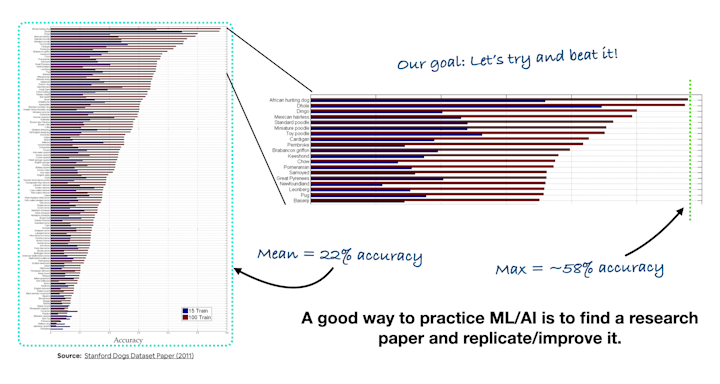

How about we try and replicate the same plot with our own results, and then we can see the accuracy of each dog, as well as compare it to the original.

So, first of all, let's create a DataFrame with information about our test predictions and test samples.

We'll start by:

Getting the argmax of the test predictions as well as the test labels
Then we'll get the maximum prediction probabilities for each sample
And then we'll put it all into a DataFrame!

In [ ]:
# Get argmax labels of test predictions and test ground truth
test_preds_labels = test_preds.argmax(axis=-1)
test_ds_labels_argmax = test_ds_labels.argmax(axis=-1)

# Get highest prediction probability of test predictions
test_pred_probs_max = tf.reduce_max(test_preds, axis=-1).numpy() # extract NumPy since pandas doesn't handle TensorFlow Tensors

# Create DataFrame of test results
test_results_df = pd.DataFrame({"test_pred_label": test_preds_labels,
                                "test_pred_prob": test_pred_probs_max,
                                "test_pred_class_name": [class_names[test_pred_label] for test_pred_label in test_preds_labels],
                                "test_truth_label": test_ds_labels_argmax,
                                "test_truth_class_name": [class_names[test_truth_label] for test_truth_label in test_ds_labels_argmax]})

# Create a column whether or not the prediction matches the label
test_results_df["correct"] = test_results_df["test_pred_class_name"] == test_results_df["test_truth_class_name"]

test_results_df.head()

Now that we have our DataFrame we can perform some further analysis, such as getting the accuracy per class.

We can do so by grouping the test_results_df via the "test_truth_class_name" column and then taking the mean of the "correct" column.

We can then create a new DataFrame based on this view and sort the values by correctness (e.g. the classes with the highest performance should be up the top).

In [ ]:
# Calculate accuracy per class
accuracy_per_class = test_results_df.groupby("test_truth_class_name")["correct"].mean()

# Create new DataFrame to sort classes by accuracy
accuracy_per_class_df = pd.DataFrame(accuracy_per_class).reset_index().sort_values("correct", ascending=False)
accuracy_per_class_df.head()

# Woah! Looks like we've got a fair few dog classes that are 100% accurate or close to it.

# That's outstanding!

Now let's recreate the horizontal bar plot used on the original Stanford Dogs research paper page.

In [ ]:
# Let's create a horizontal bar chart to replicate a similar plot to the original Stanford Dogs page
plt.figure(figsize=(10, 17))
plt.barh(y=accuracy_per_class_df["test_truth_class_name"],
         width=accuracy_per_class_df["correct"])
plt.xlabel("Accuracy")
plt.ylabel("Class Name")
plt.title("Dog Vision Accuracy per Class")
plt.ylim(-0.5, len(accuracy_per_class_df["test_truth_class_name"]) - 0.5)  # Adjust y-axis limits to reduce white space
plt.gca().invert_yaxis()  # This will display the first class at the top
plt.tight_layout()
plt.show()

# It looks like our model performs incredibly well across the vast majority of all dog classes.

# In fact, when we compare it to the original Stanford Dogs horizontal bar graph we can see that their best-performing class got close to 60% accuracy. However, it's only when we take a look at our worst-performing classes do we see a handful of classes with just under 60% accuracy.

# Not bad at all!

In [ ]:
# Inspecting our worst performing classes (note how only a couple of classes perform at ~55% accuracy or below)
accuracy_per_class_df.tail()

What an awesome result! We've now replicated and even vastly improved a Stanford research paper.

So now that we've seen how well our model performs, how about we check where it performed poorly, and try to figure out why.

# How to find the most wrong examples


A great way to inspect your models errors is to find the examples where the prediction had a high probability but the prediction was wrong.

This is often called the "most wrong" samples. The model was very confident in its prediction, but was wrong.

So, let's filter for the top 100 most wrong by sorting the incorrect predictions by the "test_pred_prob" column.

In [ ]:
# Get most wrong
top_100_most_wrong = test_results_df[test_results_df["correct"] == 0].sort_values("test_pred_prob", ascending=False)[:100]
top_100_most_wrong.head()

One way to inspect these most wrong predictions would be to go through the different breeds one by one and see why the model would've confused them, such as comparing miniature_pinscher to doberman (two quite similar-looking dog breeds).

That’s a lot of manual work, so instead, let’s get a random 10 samples and plot them to see what they look like instead.

In [ ]:
# Get 10 random indexes of "most wrong" predictions
top_100_most_wrong.sample(n=10).index

In [ ]:
# Choose a random 10 indexes from the test data and compare the values
import random

random_most_wrong_indexes = top_100_most_wrong.sample(n=10).index

# Iterate through test results and plot them
# Note: This is why we don't shuffle the test data, so that it's in original order when we evaluate it.
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
for i, ax in enumerate(axes.flatten()):
  target_index = random_most_wrong_indexes[i]

  # Get relevant target image, label, prediction and prediction probabilities
  test_image = test_ds_images[target_index]
  test_image_truth_label = class_names[tf.argmax(test_ds_labels[target_index])]
  test_image_pred_probs = test_preds[target_index]
  test_image_pred_class = class_names[tf.argmax(test_image_pred_probs)]

  # Plot the image
  ax.imshow(test_image.astype("uint8"))

  # Create sample title
  title = f"""True: {test_image_truth_label}
  Pred: {test_image_pred_class}
  Prob: {np.max(test_image_pred_probs):.2f}"""

  # Colour the title based on correctness of pred
  ax.set_title(title,
               color="green" if test_image_truth_label == test_image_pred_class else "red",
               fontsize=10)
  ax.axis("off")

Inspecting the "most wrong" examples, it's easy to see where the model got confused. Some of these breeds look very similar - with some of them being miniature versions.

These samples can show us where we might want to collect more data or correct our data's labels.

Before that though, how about we make a confusion matrix for further evaluation?

# How to create a confusion matrix


A confusion matrix helps to visualize the performance of a classification algorithm by comparing the predicted classes to the actual classes (truth vs. predictions).

We can create one using Scikit-Learn's sklearn.metrics.confusion_matrix by passing in our y_true and y_pred values.

Then we can display it using sklearn.metrics.ConfusionMatrixDisplay.



> **Note:** Because we have 120 different classes, running the code below to show the confusion matrix plot may take a minute or so to load , as it's quite a big plot. So be warned



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a confusion matrix
confusion_matrix_dog_preds = confusion_matrix(y_true=test_ds_labels_argmax, # requires all labels to be in same format (e.g. not one-hot)
                                              y_pred=test_preds_labels)
# Create a confusion matrix plot
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dog_preds,
                                                  display_labels=class_names)
fig, ax = plt.subplots(figsize=(25, 25))
ax.set_title("Dog Vision Confusion Matrix")
confusion_matrix_display.plot(xticks_rotation="vertical",
                              cmap="Blues",
                              colorbar=False,
                              ax=ax);

Now that's one big confusion matrix!

It looks like most of the darker blue boxes are down the middle diagonal (where we'd like them to be).

But there are a few instances where the model confuses classes such as scottish_deerhound and irish_wolfhound.

And looking up those two breeds we can see that they look visually similar, and are actually a common source of confusion.

# Honestly, if it wasn’t for the height difference, I would think this was the same dog with photos from different angles!

# How to save and load the best model


# We've covered a lot of ground from loading data to training and evaluating a model. But what if you wanted to use that model somewhere else, such as on a website or in an application?



> **The first step is saving it to a file.**





> We can **save our model using the tf.keras.Model.save() method** and then **specify the filepath as well as the save_format parameters**.





> We'll use **filepath="dog_vision_model.keras" as well as save_format="keras' to save our model to the new and versatile .keras format**.



# Let's save our best performing model_1.



# Note:


> You may also see models being **saved with the SavedModel format as well as HDF5 formats**. However, **it's recommended to use the newer .keras format**. See the TensorFlow documentation on saving and loading a model for more



In [ ]:
# Save the model to .keras
model_save_path = "dog_vision_model.keras"
model_1.save(filepath=model_save_path,
             save_format="keras")

And we can **check it worked by loading it back** in using the **tf.keras.models.load_model() method**.

In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model(filepath=model_save_path)

With the file saved, now we can evaluate our loaded_model to make sure it performs well on the test dataset.

In [ ]:
# Evaluate the loaded model
loaded_model_results = loaded_model.evaluate(test_ds)

# How about we check if the loaded_model_results are the same as the model_1_results?

In [ ]:
assert model_1_results == loaded_model_results

Our trained model and loaded model results are the same!

We could now use our dog_vision_model.keras file in an application to predict a dog breed based on an image.

# How to make predictions on custom images with the best model

So how about we see how our model goes on real world images. Because that's the whole goal of machine learning right? To see how your model goes in the real world?

So let’s make that happen.

More specifically, let's try our best model on images of my dogs (Bella 🐶 and Seven 7️⃣, yes, Seven is her actual name) and an extra wildcard image of me!

You can download the photos from my GitHub here.

In [ ]:
# Download a set of custom images from GitHub and unzip them
!wget -nc https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/images/dog-photos.zip
!unzip dog-photos.zip

We can also inspect our images in the file browser and see that they're under the name dog-photo-*.jpeg .

How about we iterate through them and visualize each one?

In [ ]:
# Create list of paths for custom dog images
custom_image_paths = ["dog-photo-1.jpeg",
                      "dog-photo-2.jpeg",
                      "dog-photo-3.jpeg",
                      "dog-photo-4.jpeg"]

# Iterate through list of dog images and plot each one
fig, axes = plt.subplots(1, 4, figsize=(15, 7))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(plt.imread(custom_image_paths[i]))
  ax.axis("off")
  ax.set_title(custom_image_paths[i])

# What?

The **first three photos look well** and good **but we can see dog-photo-4.jpeg is a photo of me in a black hoodie** pulling a blue steel face.

# Why include a non dog photo?

**I’ll tell you why in just a second**. For now, let's use our loaded_model to try and make a prediction on the first dog image dog-photo-1.jpeg .

We can do so with the **predict() method**.

In [ ]:
# Try and make a prediction on the first dog image
loaded_model.predict("dog-photo-1.jpeg")

Oh no, we get an error:

# Why is this?

Well, we can see that the code is trying to get the shape of our image.

However, we didn't pass an image to the predict() method. We only passed a filepath, and our model expects inputs in the same format it was trained on - hence the issue.

So **let's load our image and resize it**.

We can do so with **tf.keras.utils.load_img()** .

In [ ]:
# Load the image (into PIL format)
custom_image = tf.keras.utils.load_img(
  path="dog-photo-1.jpeg",
  color_mode="rgb",
  target_size=IMG_SIZE, # (224, 224) or (img_height, img_width)
)

type(custom_image), custom_image

# Excellent, we've loaded our first custom image.



> But now **let's turn our image into a tensor**, as our model was trained on image tensors, so it expects image tensors as input.

> We can **convert our image from PIL format to array format with tf.keras.utils.img_to_array()**.







In [ ]:
# Turn the image into a tensor
custom_image_tensor = tf.keras.utils.img_to_array(custom_image)
Custom_image_tensor.shape

# Nice! We've got an image tensor of shape (224, 224, 3).

So **how about we make a prediction on it?**

In [ ]:
# Make a prediction on our custom image tensor
loaded_model.predict(custom_image_tensor)

# We get another error…

**So what went wrong?**

Well, it looks like our **model is expecting a batch size dimension on our input tensor also**.

We can get this by **either turning the input tensor into a single element array** or by **using tf.expand_dims(input, axis=0)** to expand the dimension of the tensor on the 0th axis.

In [ ]:
# Option 1: Add batch dimension to custom_image_tensor
print(f"Shape of custom image tensor: {np.array([custom_image_tensor]).shape}")
print(f"Shape of custom image tensor: {tf.expand_dims(custom_image_tensor, axis=0).shape}")

# Wonderful!!! We've now got a custom image tensor of shape (1, 224, 224, 3) ((batch_size, img_height, img_width, colour_channels)).

In [ ]:
# Get prediction probabilities from our model
pred_probs = loaded_model.predict(tf.expand_dims(custom_image_tensor, axis=0))
Pred_probs

# It worked!!! Our model outputs a tensor of prediction probabilities.

We can find the predicted label by taking the argmax of the pred_probs tensor. And we get the predicted class name by indexing on the class_names list using the predicted label.

In [ ]:
# Get the predicted class label
pred_label = tf.argmax(pred_probs, axis=-1).numpy()[0]

# Get the predicted class name
pred_class_name = class_names[pred_label]

print(f"Predicted class label: {pred_label}")
print(f"Predicted class name: {pred_class_name}")

# It’s looking good and the errors are all gone.

# How?



> **Simply because our model wants to make predictions on data in the same shape and format it was trained on.**





> So **if you trained a model on image tensors with a certain shape and datatype, your model will want to make predictions on the same kind of image tensors with the same shape and datatype.**





> Now that it’s all set up correctly, **how about we try and make predictions on multiple images?**





In [ ]:
def pred_on_custom_image(image_path: str,  # Path to the image file
                         model,  # Trained TensorFlow model for prediction
                         target_size: tuple[int, int] = (224, 224),  # Desired size of the image for input to the model
                         class_names: list = None,  # List of class names (optional for plotting)
                         plot: bool = True): # Whether to plot the image and predicted class
  """
  Loads an image, preprocesses it, makes a prediction using a provided model,
  and optionally plots the image with the predicted class.

  Args:
      image_path (str): Path to the image file.
      model: Trained TensorFlow model for prediction.
      target_size (int, optional): Desired size of the image for input to the model. Defaults to 224.
      class_names (list, optional): List of class names for plotting. Defaults to None.
      plot (bool, optional): Whether to plot the image and predicted class. Defaults to True.

  Returns:
     str: The predicted class.
  """

  # Prepare and load image
  custom_image = tf.keras.utils.load_img(
    path=image_path,
    color_mode="rgb",
    target_size=target_size,
  )

  # Turn the image into a tensor
  custom_image_tensor = tf.keras.utils.img_to_array(custom_image)

  # Add a batch dimension to the target tensor (e.g. (224, 224, 3) -> (1, 224, 224, 3))
  custom_image_tensor = tf.expand_dims(custom_image_tensor, axis=0)

  # Make a prediction with the target model
  pred_probs = model.predict(custom_image_tensor)

  # pred_probs = tf.keras.activations.softmax(tf.constant(pred_probs))
  pred_class = class_names[tf.argmax(pred_probs, axis=-1).numpy()[0]]

  # Plot if we want
  if not plot:
    return pred_class, pred_probs
  else:
    plt.figure(figsize=(5, 3))
    plt.imshow(plt.imread(image_path))
    plt.title(f"pred: {pred_class}\nprob: {tf.reduce_max(pred_probs):.3f}")
    plt.axis("off")

# What a good-looking function!



In [ ]:
# Make prediction on custom dog photo 2
pred_on_custom_image(image_path="dog-photo-2.jpeg",
                     model=loaded_model,
                     class_names=class_names)

# Woohoo!!! Our model got it right!

Let's **repeat the process** for our other custom images.



In [ ]:
# Predict on multiple images
fig, axes = plt.subplots(1, 4, figsize=(15, 7))
for i, ax in enumerate(axes.flatten()):
  image_path = custom_image_paths[i]
  pred_class, pred_probs = pred_on_custom_image(image_path=image_path,
                                                model=loaded_model,
                                                class_names=class_names,
                                                plot=False)
  ax.imshow(plt.imread(image_path))
  ax.set_title(f"pred: {pred_class}\nprob: {tf.reduce_max(pred_probs):.3f}")
  ax.axis("off");

# Epic!

Our Dog Vision 🐶👁 model has come to life.

It looks like our model got it right for 3 of our 4 custom dog photos (my dogs Bella and Seven are labrador retrievers, with a potential mix of something else).

But the model seemed to also think the photo of me was a Boston bulldog!



> **Note:** Due to the randomness of machine learning, your result may be different here. If so, please let me know, I'd love to see what other kinds of dogs the model thinks I am 😆.



You might be wondering, why does our model do this? Why does it think I’m a dog?

It's because our model has been strictly trained to always predict a dog breed, no matter what image it receives. So no matter what image we pass to our model, it will always try to predict a dog from the image.

# So how could we fix this?

**One solution would be to create a filter system**.






*   Have the first system train another model to predict whether the input image is of a dog or is not of a dog
*   And then only letting our Dog Vision 🐶👁 model predict on the images that are of dogs

Is it a dog? If no then skip. If yes, then what type of dog?
